<a href="https://colab.research.google.com/github/vinit-p1/DataAnalysis-Dashboard/blob/main/vinit_pahilajani_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### GOAL
The goal is to model the price of cars with the available variables. It will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

UNDRESTANDING VARIABLES OF DATASET

- ID:
 Id number of a car

- Price:
Price of a car
- Levy:
Levy is a tax related term. Tax of importing and exporting the cars.
- Manufacturer:
 Car Manufacturer who has manufactured the car
- Model:
It is a model name of a car that has been manufactured
- Prod. year:
it represents the year in which that particular car was manufactured
- Category:
It represents the category name of a car
- Leather interior:
It is in binary form in the dataset named Yes or No
- Fuel type:
There are some fuel types in the dataset that represent what type of fuel a car has.
- Engine volume:
What volume of engine does a car have ?
- Mileage:
What mileage does a car give?
- Cylinders:
It means how many cylinders are in the car.
- Gear box type:
What type of gear box is included in the car.
- Drive wheels:
What kind of drive wheels do cars have.
- Doors:
How many Doors are in the car.
- Wheel:
Which hand-drive a car is having.
- Color:
What kind of color a car has
- Airbags:
How many Airbags are in the car.

In [ ]:
!pip install sweetviz
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 10.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sweetviz as sw
import category_encoders as ce
import time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/car_price_prediction.csv")
data.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
data.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

                                             |          | [  0%]   00:00 -> (? left)


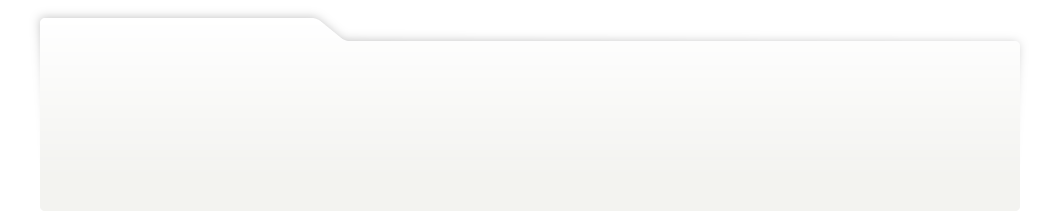
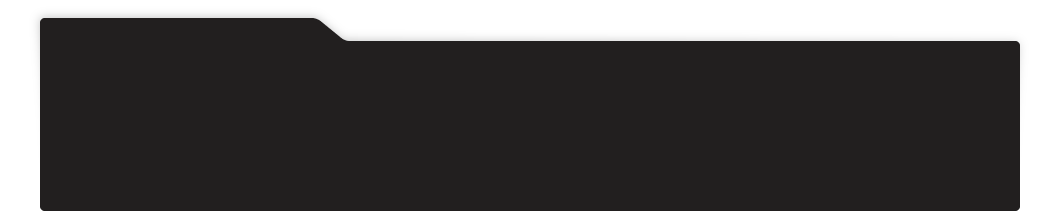
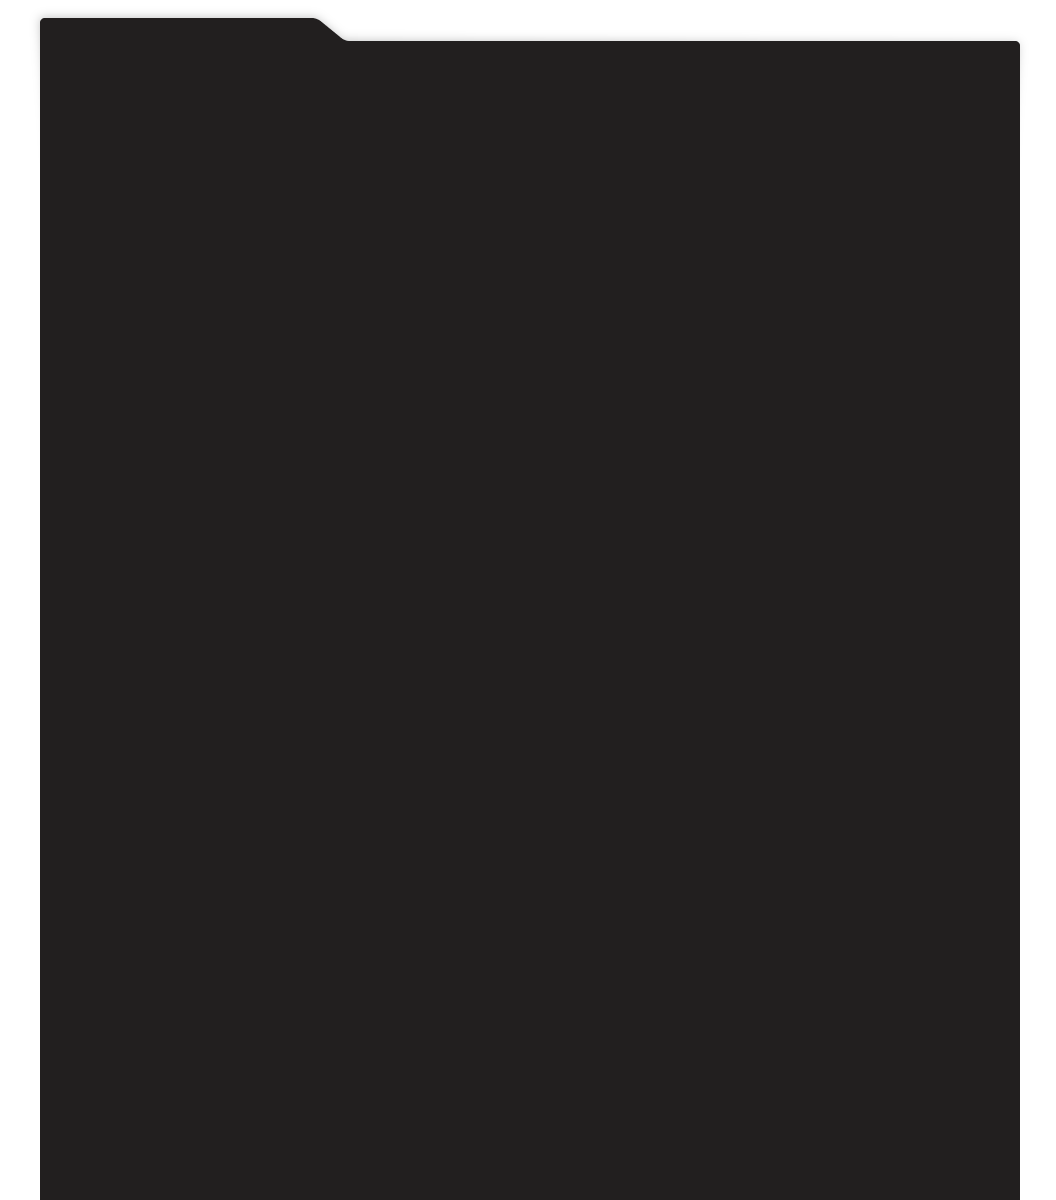
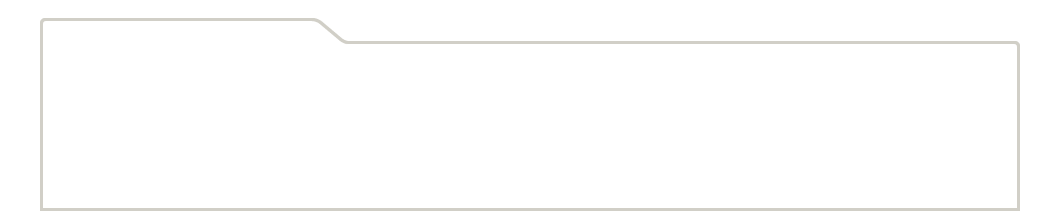
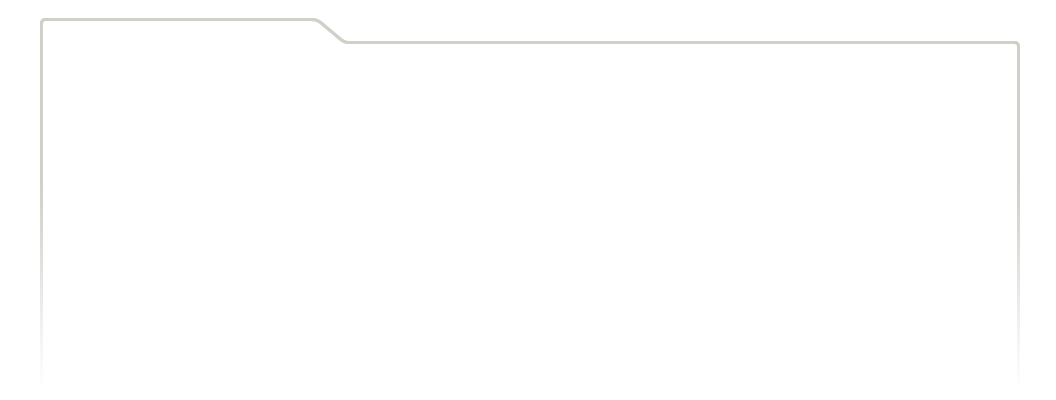
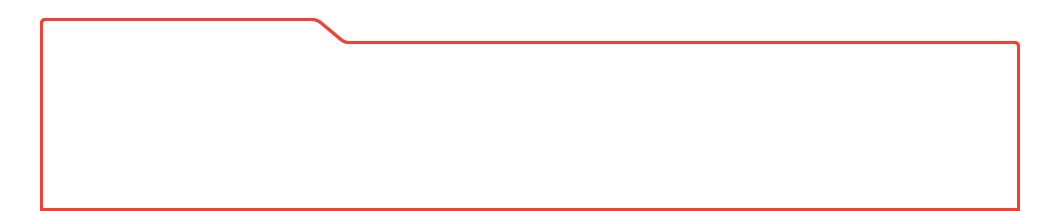
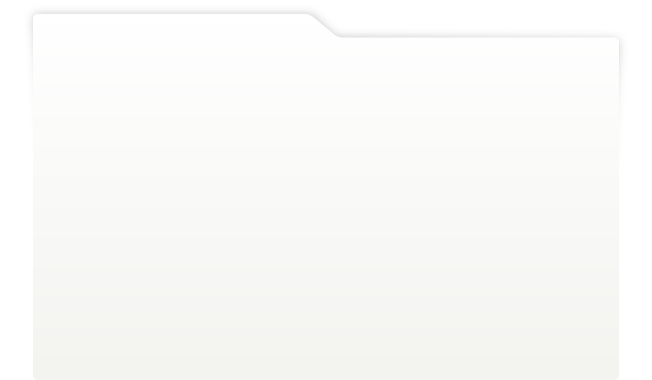
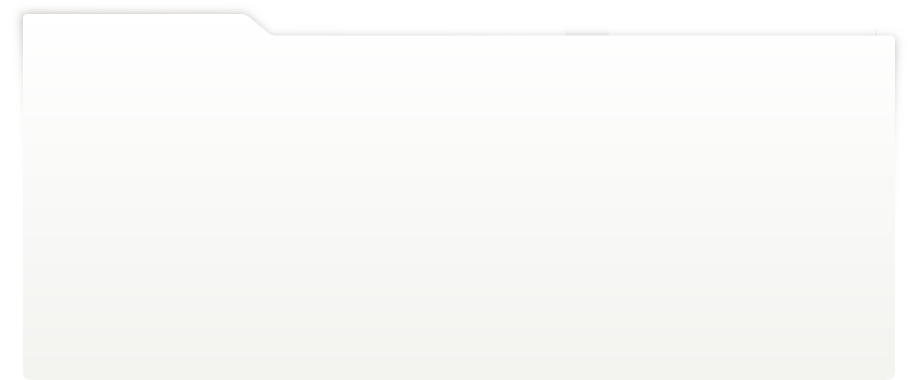
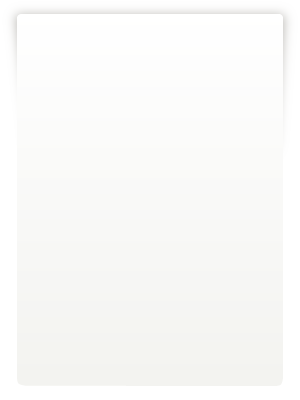
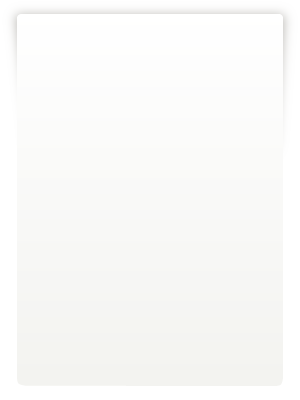
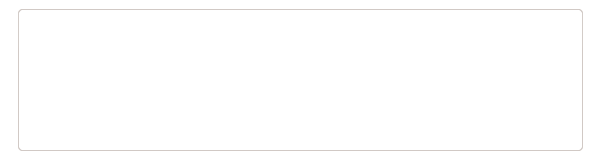
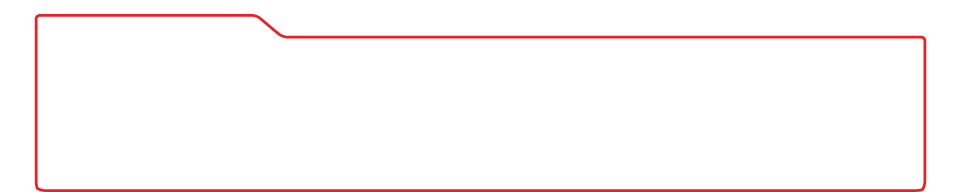
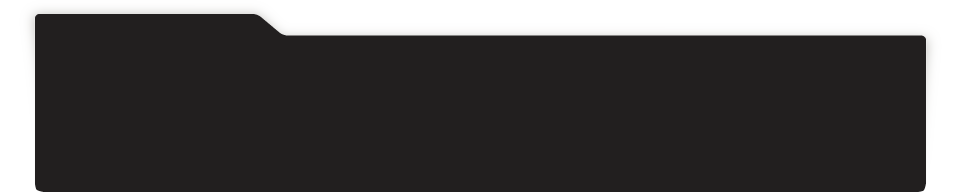
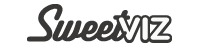
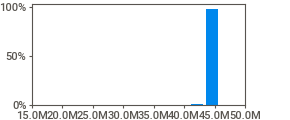
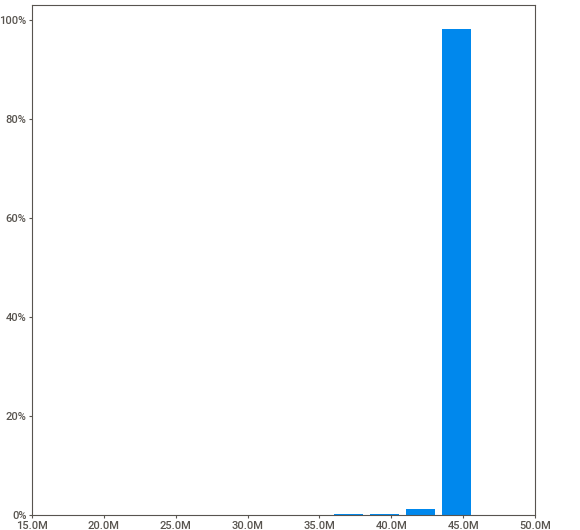
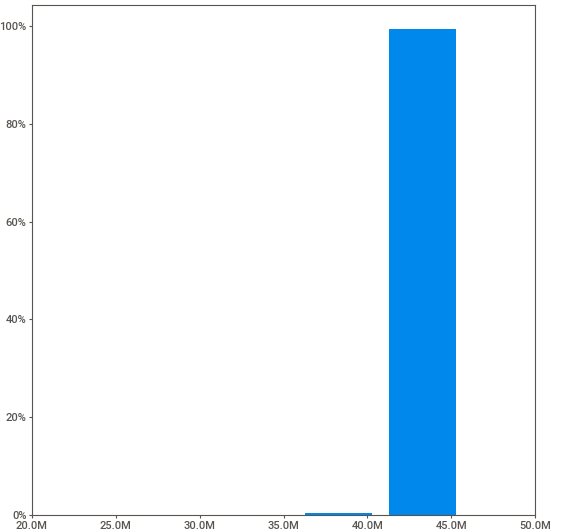
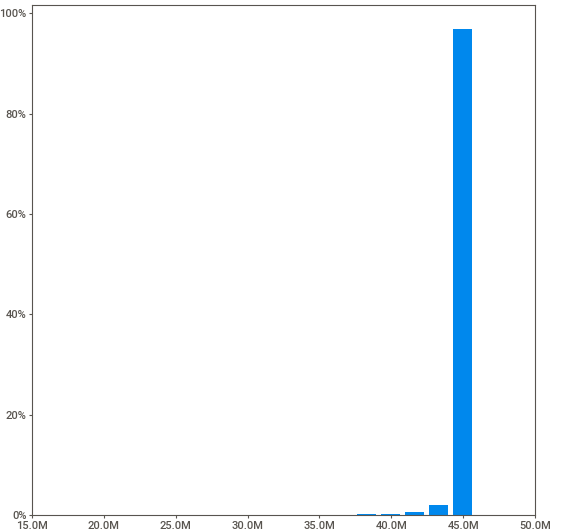
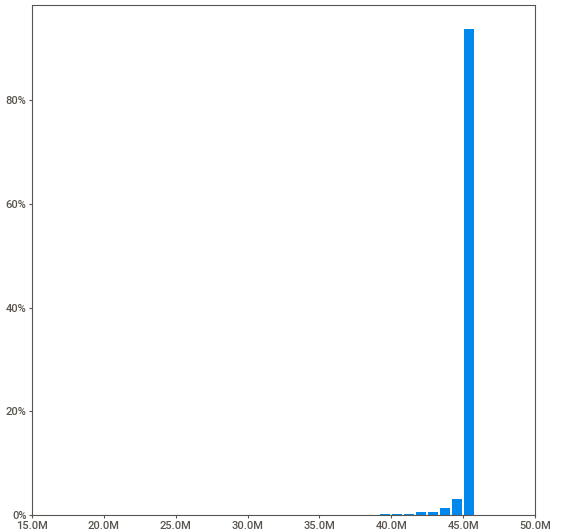
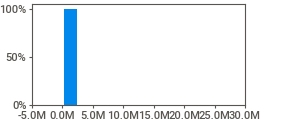
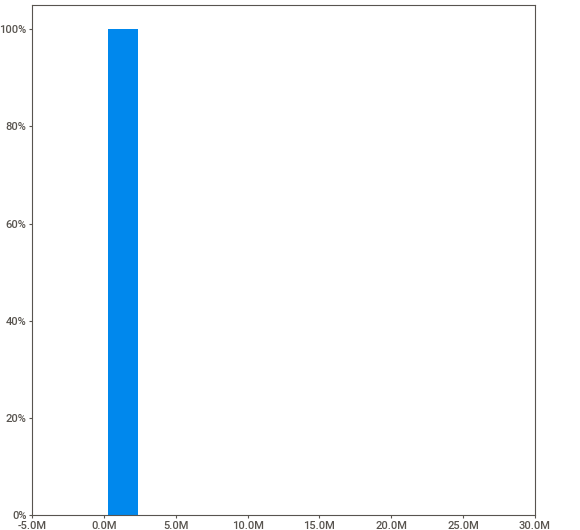
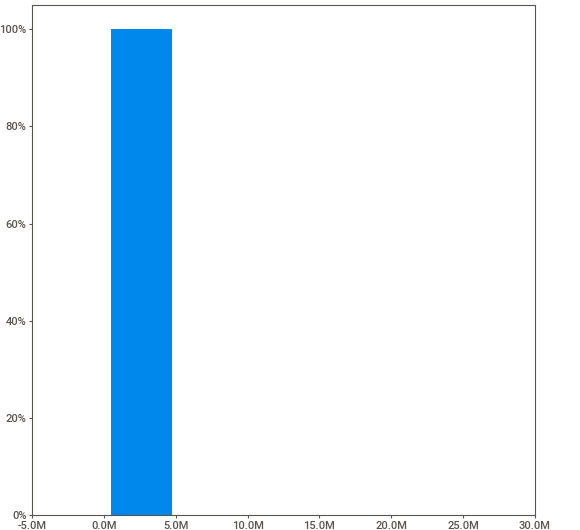
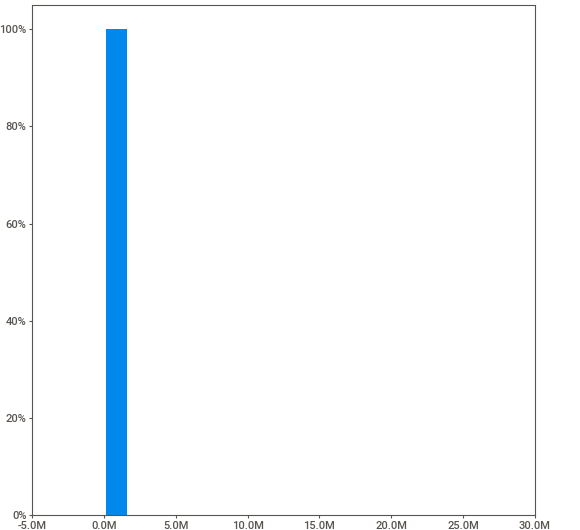
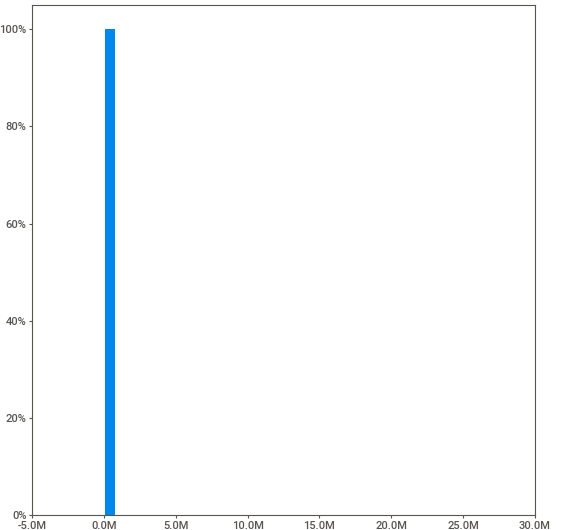
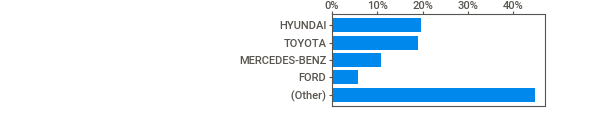
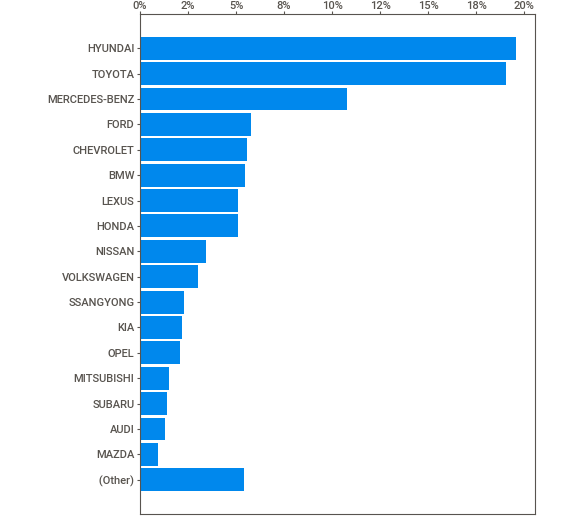
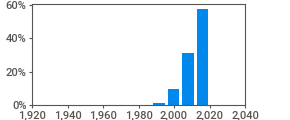
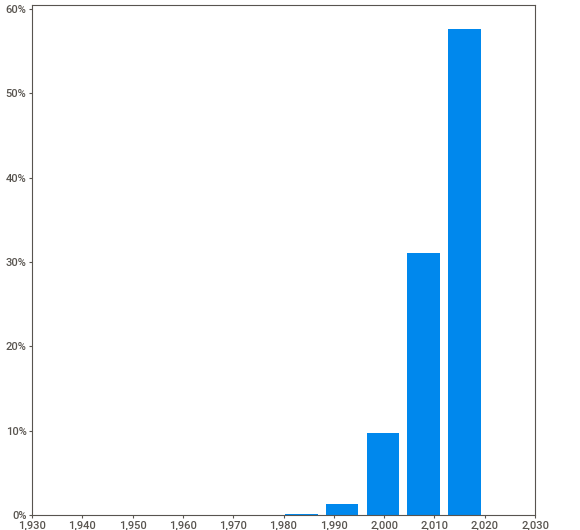
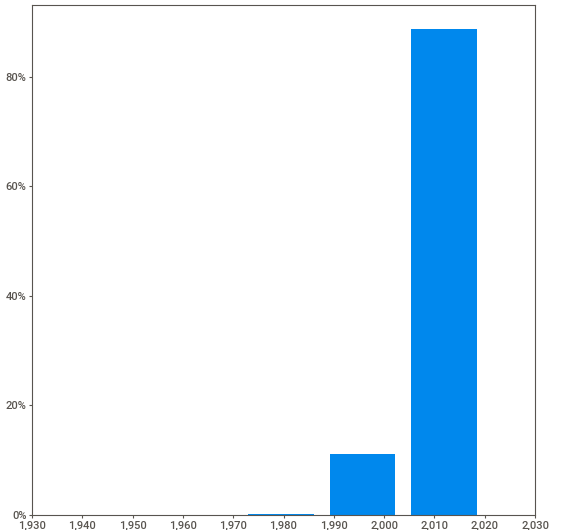
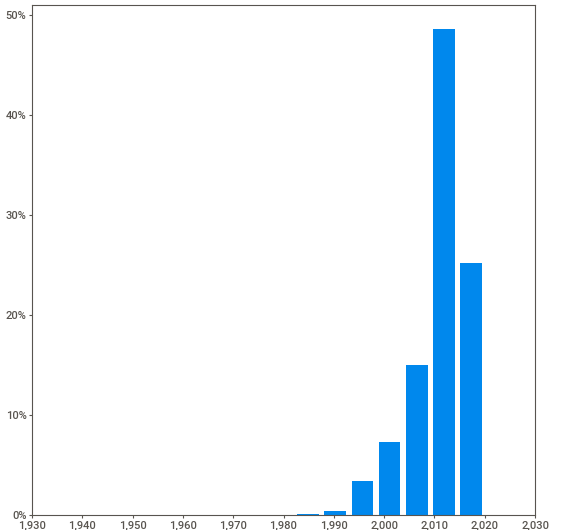
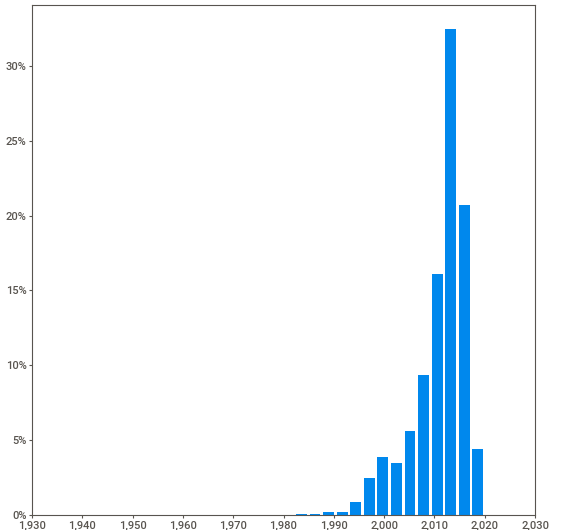
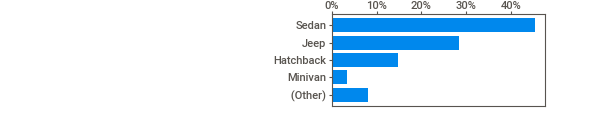
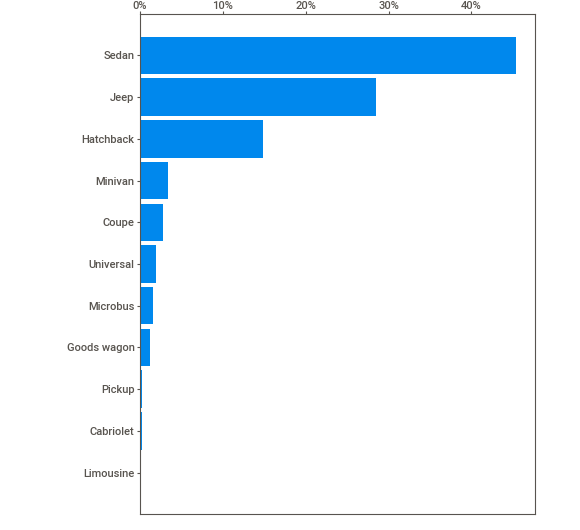
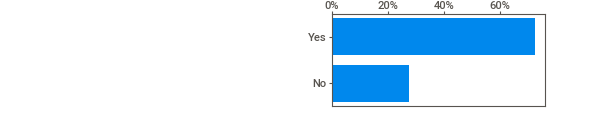
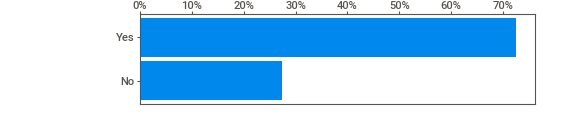
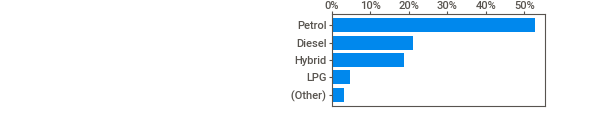
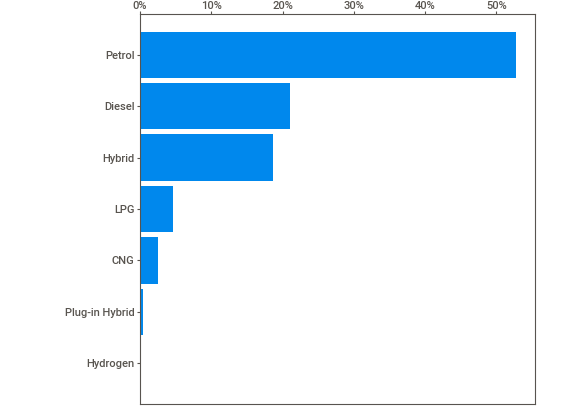
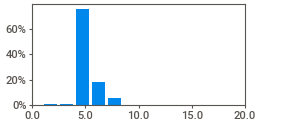
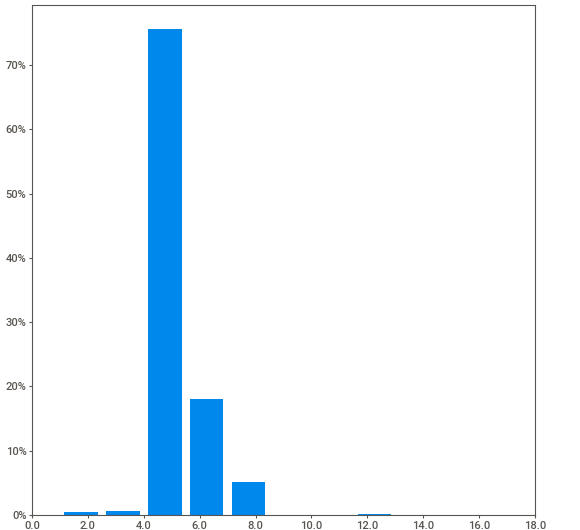
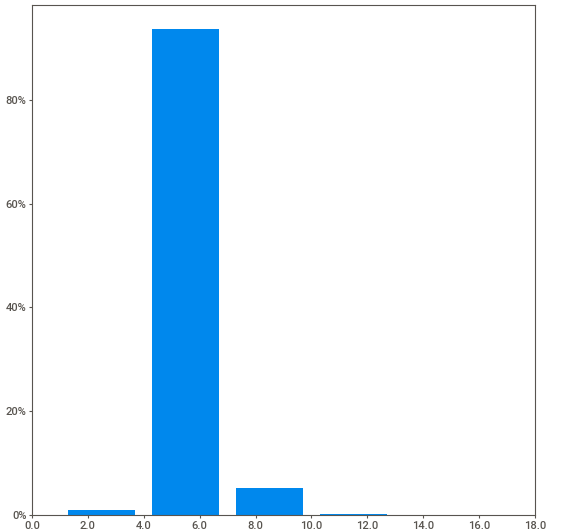
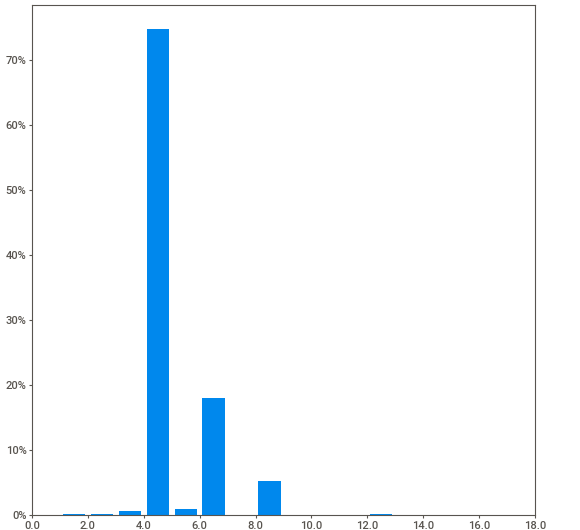
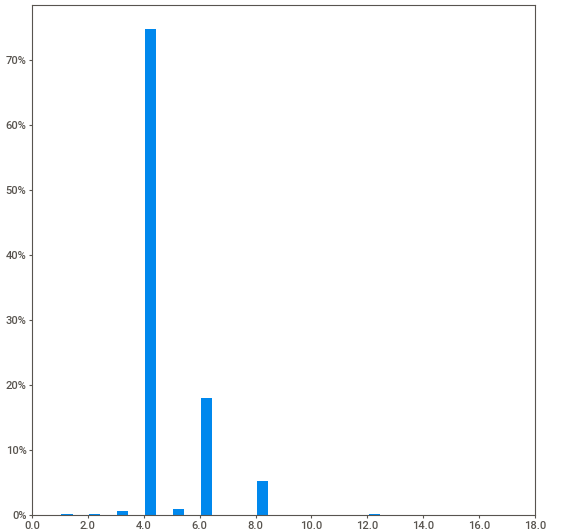
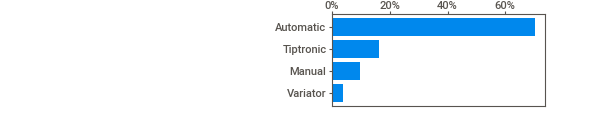
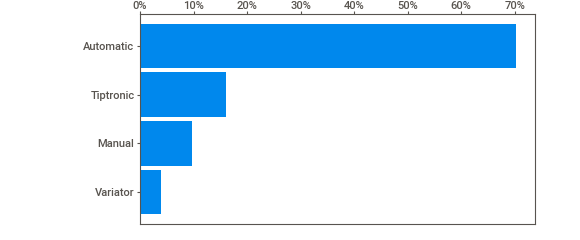
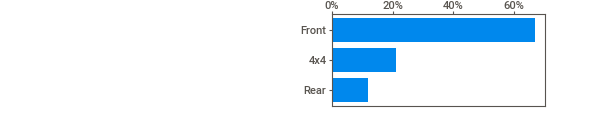
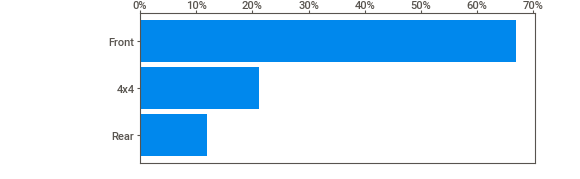
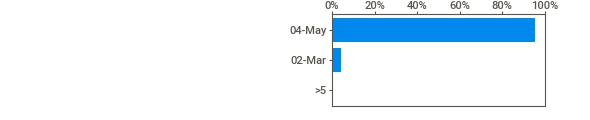
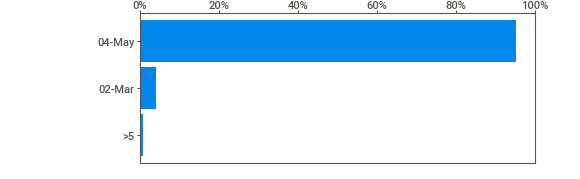
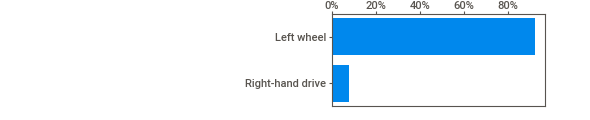
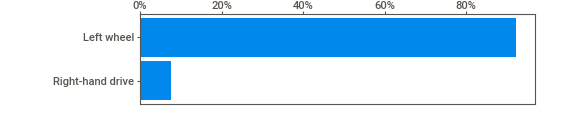
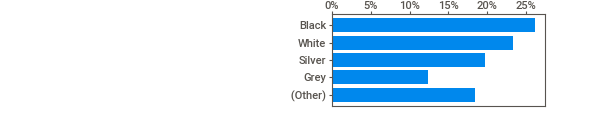
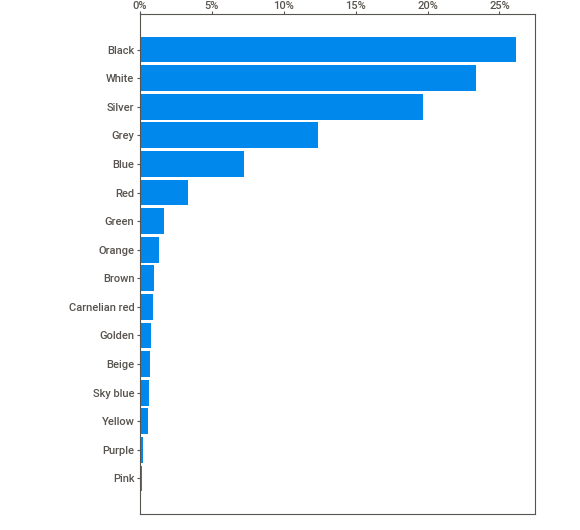
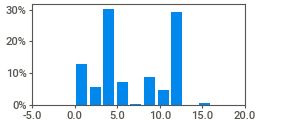
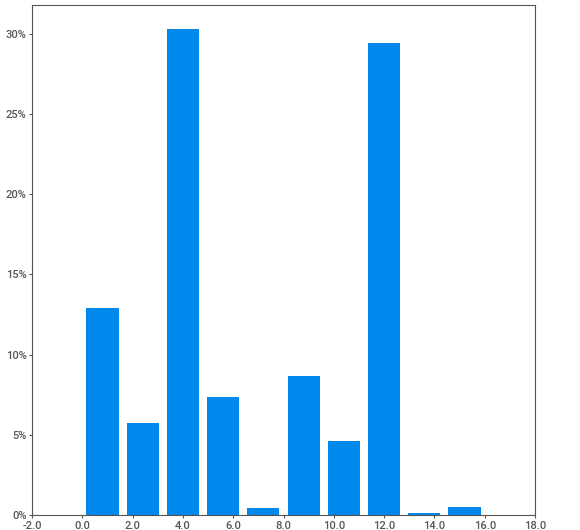
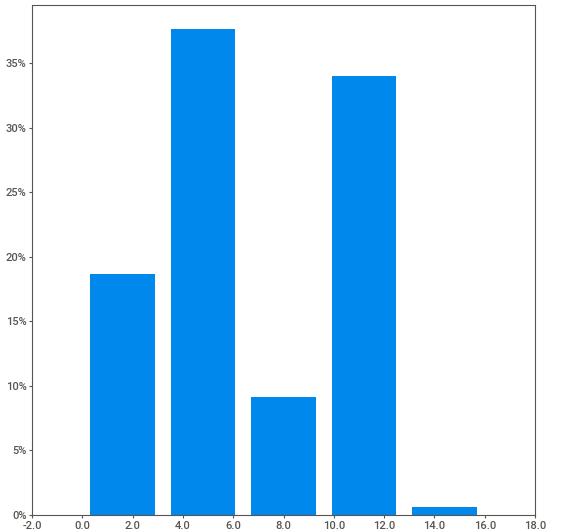
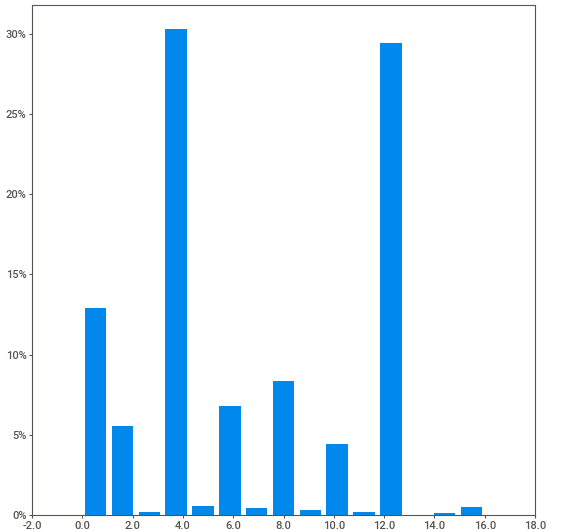
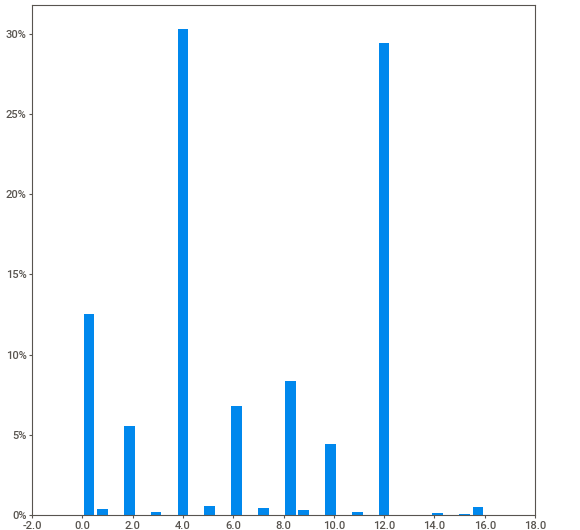
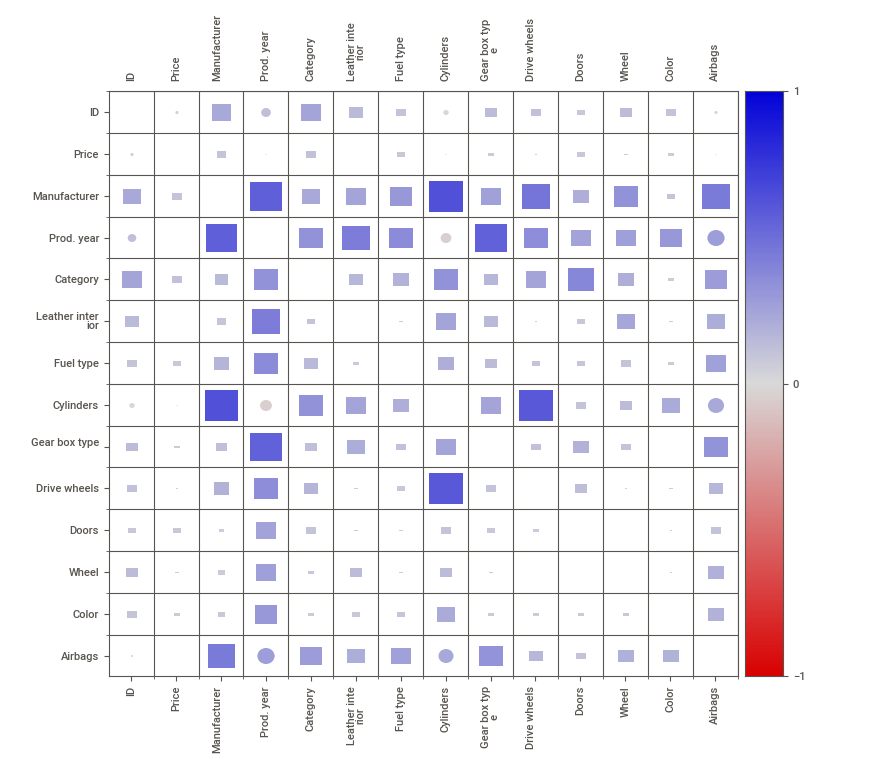
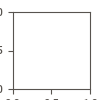

In [ ]:
data_report= sw.analyze(data)
data_report.show_notebook()

- ID:
There are 19,237 ID in the dataset
- Price:
There is high variation in the price of cars.
- Levy:
There are 30% cars having 0 levy and most of the levy range on car is between 500 and 1000. There is high variation in the levy.
- Manufacturer:
There are 20% Hyundai,19 % Toyota and 11% Mercedes-benz cars in the dataset.
- Model:
There are 1590 models in the car datset.
- Prod. year:
There is dataset of cars from the production year 1939 to 2020.
- Category:
There are 11 categories of the cars in the dataset.
- Leather interior:
It is a binary variable containing yes or no.
- Fuel type:
There are 7 Types of fuel of cars.
- Engine volume:
There are 60 Distinct values of engine volume.
- Mileage:
Most of the car give mileage between 1,00,000 to 2,00,000.
- Cylinders: 74.7% of the cars havinng 4 cylinders and rest come under between 1 and 16, and it is highly positive correlated with engine volume.
- Gear box type:
There are 4 types of Gears for the cars and 70% of all cars are automatic gear type.
- Drive wheels:
There are 3 types of drive wheels.
- Doors:
95% of the cars having 4-5 doors, there are less than 1% cars having more than 5 doors.
- Wheel:
it means left hand and right hand cars,there are 92% left hand drive cars.
- Color:
there are 16 colors of the cars.
- Airbags:
There are 17 distinct values of the airbags in the car.

In [ ]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
data.columns=data.columns.str.lower().str.replace(" ","_")
data.rename(columns={'prod._year': 'prod_year'}, inplace=True)
data.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [ ]:
data.duplicated().sum()

313

In [ ]:
data.drop_duplicates(inplace=True)
data.drop('id',axis = 1,inplace = True)
print(f'Data after removal of duplicates and unnecessary id column {data.shape}')

Data after removal of duplicates and unnecessary id column (18924, 17)


In [ ]:
data.head()

price  levy manufacturer    model  prod_year   category leather_interior  \
0  13328  1399        LEXUS   RX 450       2010       Jeep              Yes   
1  16621  1018    CHEVROLET  Equinox       2011       Jeep               No   
2   8467     -        HONDA      FIT       2006  Hatchback               No   
3   3607   862         FORD   Escape       2011       Jeep              Yes   
4  11726   446        HONDA      FIT       2014  Hatchback              Yes   

  fuel_type engine_volume    mileage  cylinders gear_box_type drive_wheels  \
0    Hybrid           3.5  186005 km        6.0     Automatic          4x4   
1    Petrol             3  192000 km        6.0     Tiptronic          4x4   
2    Petrol           1.3  200000 km        4.0      Variator        Front   
3    Hybrid           2.5  168966 km        4.0     Automatic          4x4   
4    Petrol           1.3   91901 km        4.0     Automatic        Front   

    doors             wheel   color  airbags  
0  04-May        Left wheel  Silver       12  
1  04-May        Left wheel   Black        8  
2  04-May  Right-hand drive   Black        2  
3  04-May        Left wheel   White        0  
4  04-May        Left wheel  Silver        4

In [ ]:
data['levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

'-' Can be replaced with 0 and later can be converted to int type to make the data good

In [ ]:
data['levy'] = data['levy'].replace(['-'],['0'])
data['levy'] = data['levy'].astype(str).astype(int)
data['levy'].value_counts()

0       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: levy, Length: 559, dtype: int64

In [ ]:
data['engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
# making a new turbo column which is either positive 1 or negative 0
data['turbo'] = data['engine_volume'].str.contains("Turbo").map({False:0,True:1})
data['engine_volume']=data['engine_volume'].str.replace('Turbo','')
data['engine_volume']= data['engine_volume'].astype(str).astype(float)
data['engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: engine_volume, Length: 18924, dtype: float64

In [ ]:
data['turbo'].value_counts()

0    17032
1     1892
Name: turbo, dtype: int64

In [ ]:
# Removing km and converting into int
data["mileage"]=data["mileage"].str[:-2]
data['mileage'] = data['mileage'].astype('int64')
data['mileage'].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [ ]:
data['doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
data=data.replace({'doors' : { '04-May' : '4-5', '02-Mar' : '2-3'}})
data['doors'].value_counts()

4-5    18032
2-3      768
>5       124
Name: doors, dtype: int64

In [ ]:
cat_feature = [feature for feature in data.columns if data[feature].dtype == 'O' ]
data[cat_feature].head()

manufacturer    model   category leather_interior fuel_type gear_box_type  \
0        LEXUS   RX 450       Jeep              Yes    Hybrid     Automatic   
1    CHEVROLET  Equinox       Jeep               No    Petrol     Tiptronic   
2        HONDA      FIT  Hatchback               No    Petrol      Variator   
3         FORD   Escape       Jeep              Yes    Hybrid     Automatic   
4        HONDA      FIT  Hatchback              Yes    Petrol     Automatic   

  drive_wheels doors             wheel   color  
0          4x4   4-5        Left wheel  Silver  
1          4x4   4-5        Left wheel   Black  
2        Front   4-5  Right-hand drive   Black  
3          4x4   4-5        Left wheel   White  
4        Front   4-5        Left wheel  Silver

In [ ]:
num_feature = [feature for feature in data.columns if data[feature].dtype != 'O' ]
data[num_feature].head()

price  levy  prod_year  engine_volume  mileage  cylinders  airbags  turbo
0  13328  1399       2010            3.5   186005        6.0       12      0
1  16621  1018       2011            3.0   192000        6.0        8      0
2   8467     0       2006            1.3   200000        4.0        2      0
3   3607   862       2011            2.5   168966        4.0        0      0
4  11726   446       2014            1.3    91901        4.0        4      0

### Handling Outliers if any

In [ ]:
#Plotting of Outliers
def plotoutliersbef(column):

    plt.figure(figsize=(20,3))
    plt.suptitle('Distribution before handling of outlier')
    plt.subplot(1,2,1)
    plt.title(f'Car {column} Distribution Plot')
    sns.distplot(data[f'{column}'],color= 'red')
    plt.subplot(1,2,2)
    plt.title('Car Price box Plot')
    sns.boxplot(y=column, data=data)

    plt.show()

def plotoutliersaft(column):

    plt.figure(figsize=(20,3))
    plt.suptitle('Distribution after handling of outlier')
    plt.subplot(1,2,1)
    plt.title(f'Car {column} Distribution Plot')
    sns.distplot(data[f'{column}'],color= 'red')
    plt.subplot(1,2,2)
    plt.title('Car Price box Plot')
    sns.boxplot(y=column, data=data)

    plt.show()

In [ ]:
Q1 = data[num_feature].quantile(0.25)
Q3 = data[num_feature].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each numerical column
outliers = ((data[num_feature] < lower_bound) | (data[num_feature] > upper_bound)).sum()

# Calculate the outlier percentage
outlier_percentage = (outliers / len(data[num_feature])) * 100

print("Outlier Percentage:")
print(outlier_percentage)

Outlier Percentage:
price             5.574931
levy              0.845487
prod_year         5.083492
engine_volume     7.176073
mileage           3.355527
cylinders        25.179666
airbags           0.000000
turbo             9.997886
dtype: float64


Even though outlier percentage for cylinder is high but it is totally normal because cylinders is a not a continuous variable. Similarly for others.

In [ ]:
out_feature=['price', 'levy', 'engine_volume', 'mileage']
#Solving outliers
def iqrhandle(column):
      df_new = data.copy()
      q1 = data[f'{column}'].quantile(0.25)
      q3 = data[f'{column}'].quantile(0.75)
      iqr = q3-q1  #IQR
      fence_low  = q1-1.5*iqr
      fence_high = q3+1.5*iqr
      df_new.loc[:,  column] = np.where(data[f'{column}']> fence_high, fence_high,
                                       np.where(data[f'{column}']< fence_low, fence_low,
                                                data[f'{column}']))
      return df_new


1. Price column

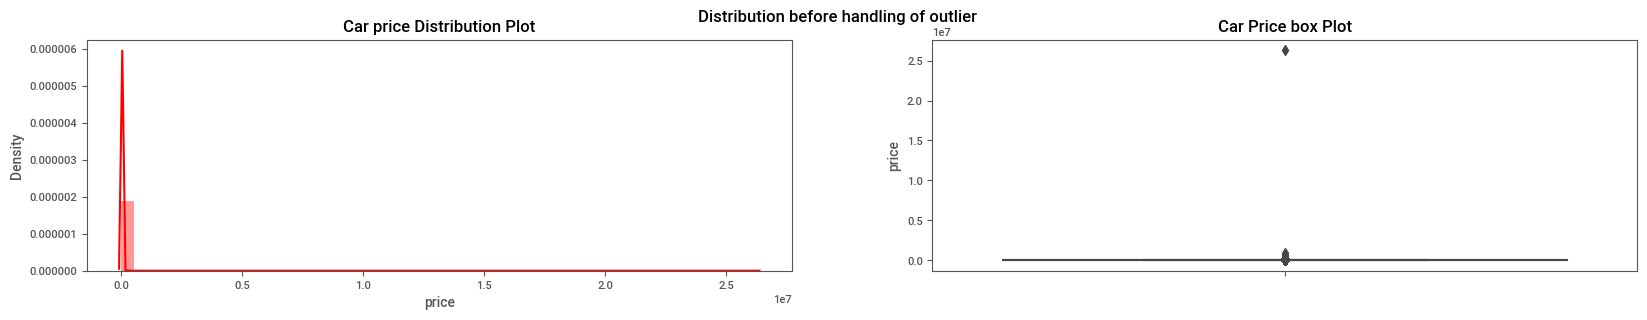

In [ ]:
plotoutliersbef('price')

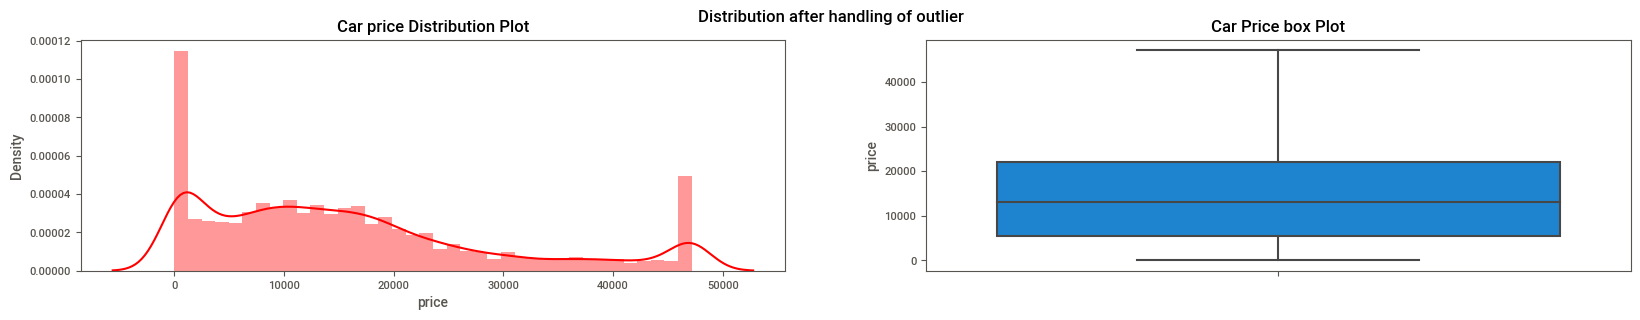

In [ ]:
data= iqrhandle('price')
plotoutliersaft('price')

2. Levy column

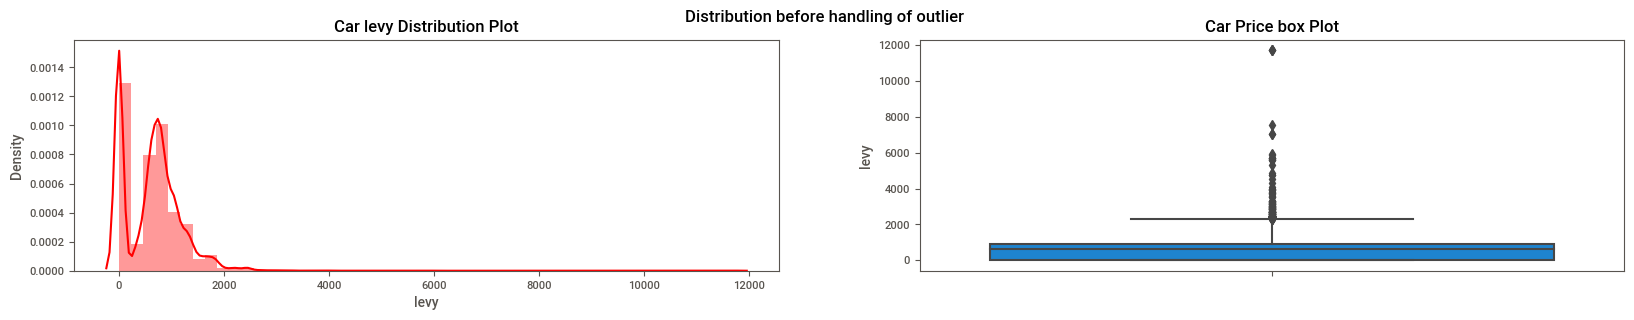

In [ ]:
plotoutliersbef('levy')

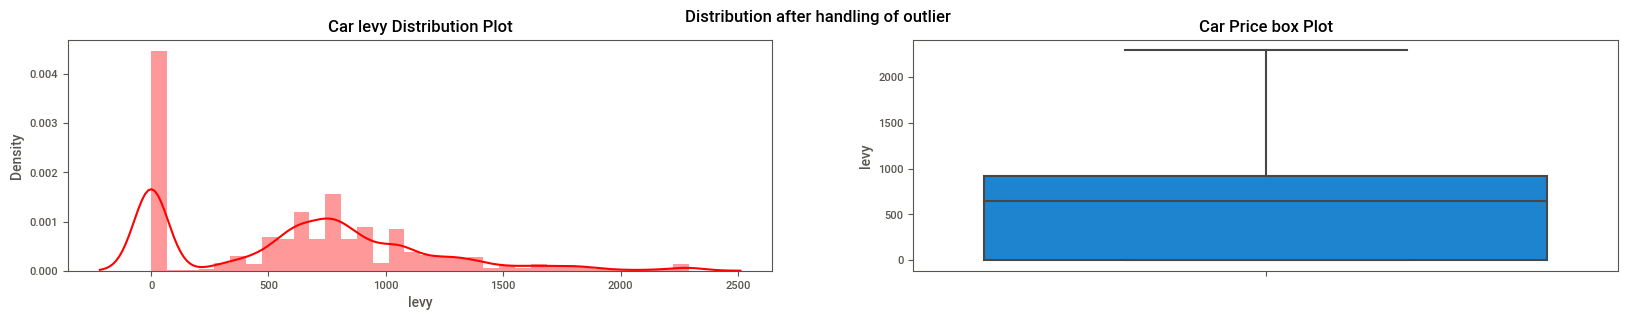

In [ ]:
data= iqrhandle('levy')
plotoutliersaft('levy')

3. Engine Volume

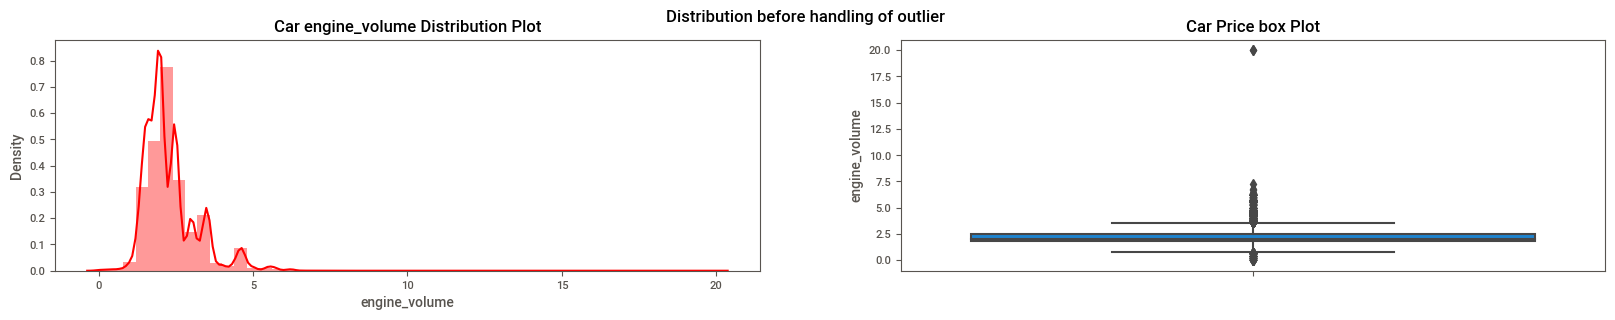

In [ ]:
plotoutliersbef('engine_volume')

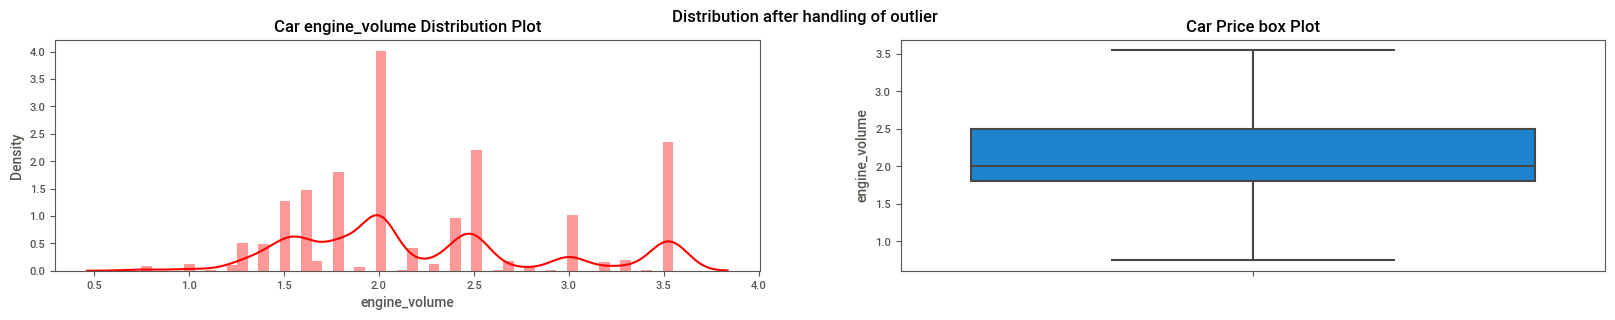

In [ ]:
data= iqrhandle('engine_volume')
plotoutliersaft('engine_volume')

4. Mileage

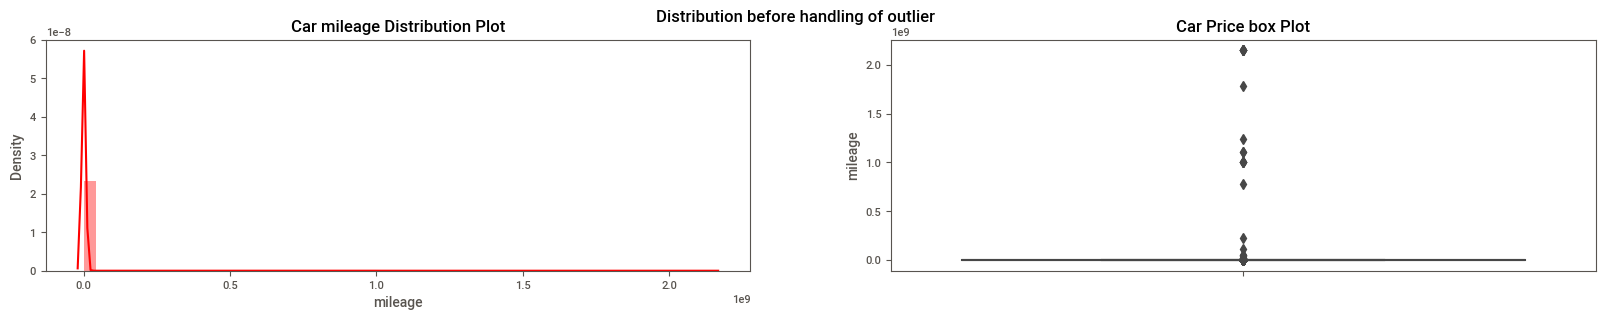

In [ ]:
plotoutliersbef('mileage')

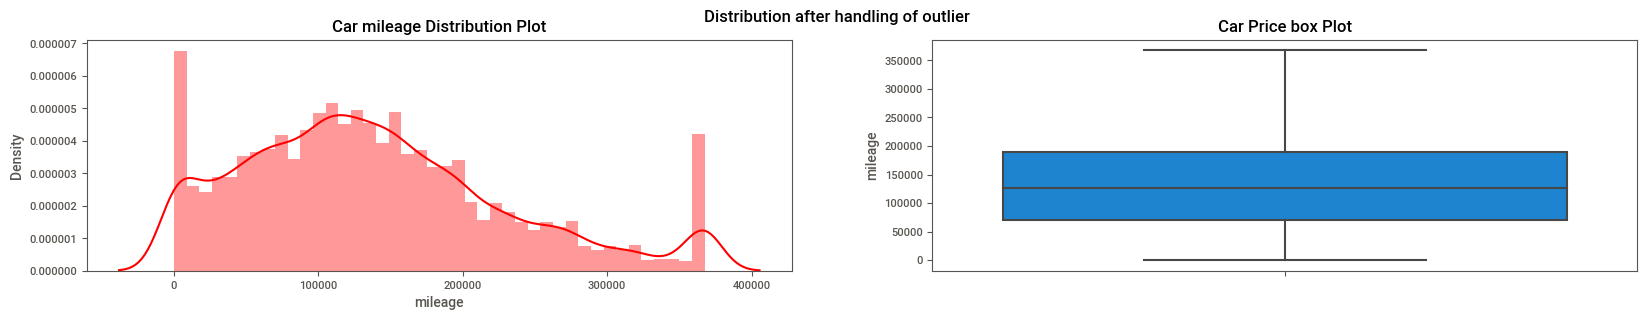

In [ ]:
data= iqrhandle('mileage')
plotoutliersaft('mileage')

In [ ]:
data.shape

(18924, 18)

### **Visualisation**

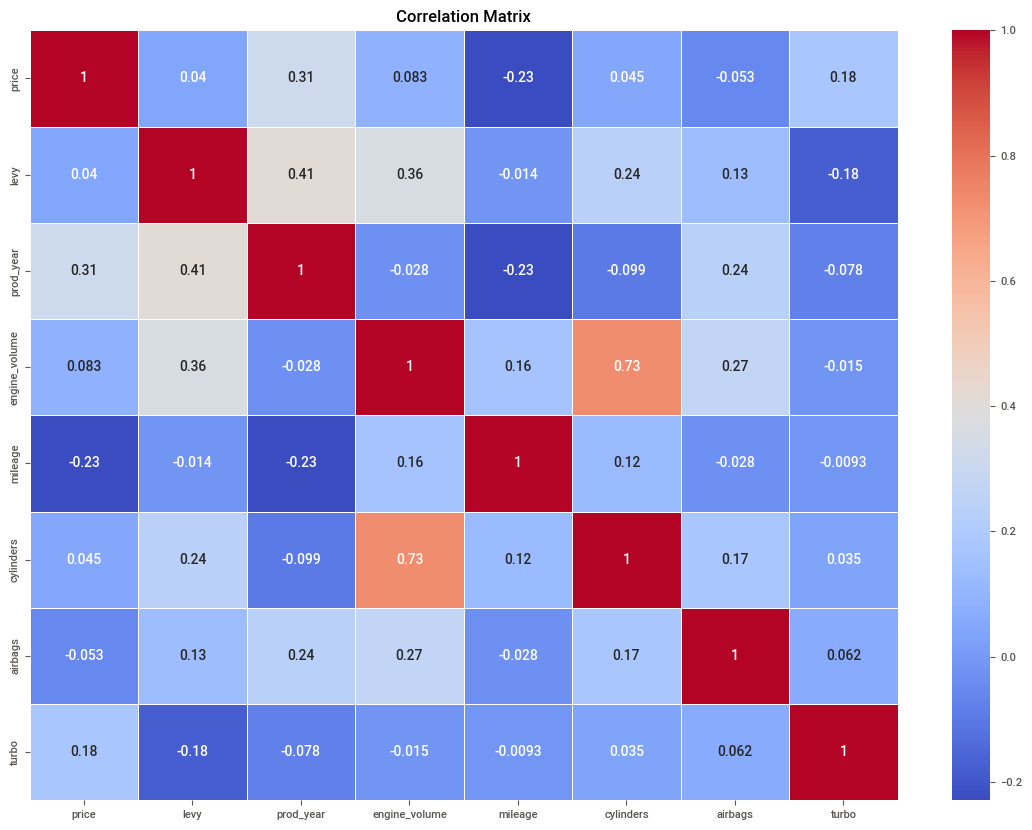

In [ ]:
# We are preparing Correlation matrix to see which attributes are correlated to each other to perform further visualisation
correlation_matrix = data.corr()
price_correlation = correlation_matrix['price']

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Positive correlations:
*   
Price is positively correlated with prod_year (0.31), engine_volume (0.08), and
turbo (0.17).

* Levy is positively correlated with prod_year (0.41), engine_volume (0.35), and cylinders (0.23).

* Engine_volume is positively correlated with cylinders (0.72).

* Airbags is positively correlated with prod_year (0.23), engine_volume (0.27), and cylinders (0.17).

Negative correlations:

* Price is negatively correlated with mileage (-0.22) and airbags (-0.05).
* Mileage is negatively correlated with price (-0.22).

1. Manufacturers

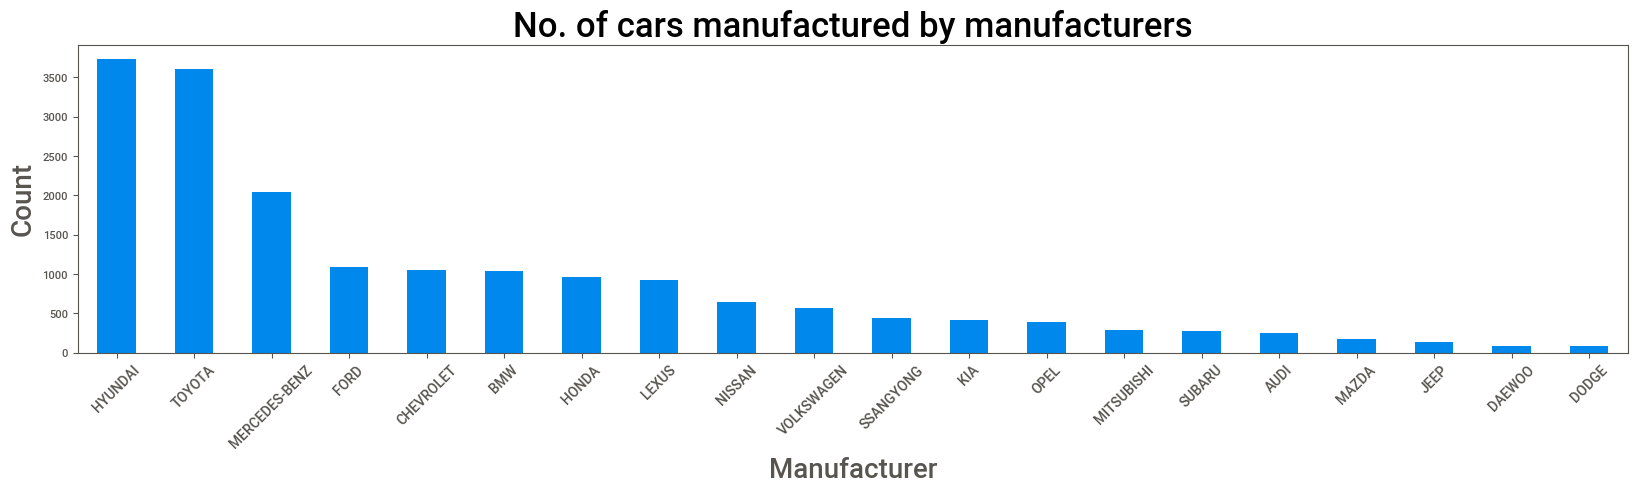


HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: manufacturer, dtype: int64
There are 65 Manufacturers in the dataset


In [ ]:
plt.figure(figsize=(20, 4))
manufacturer_counts = data['manufacturer'].value_counts().nlargest(n=20).sort_values(ascending=False)
ax = manufacturer_counts.plot(kind='bar')

plt.title('No. of cars manufactured by manufacturers', fontsize=25)
plt.xlabel("Manufacturer", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.show()
print()
print(data['manufacturer'].value_counts().nlargest(n=10))
print(f'There are {data["manufacturer"].nunique()} Manufacturers in the dataset')


As shown, Hyundai,Toyota,Mercedes-benz,Chevrolet are the companies which manufactured highest number of cars.

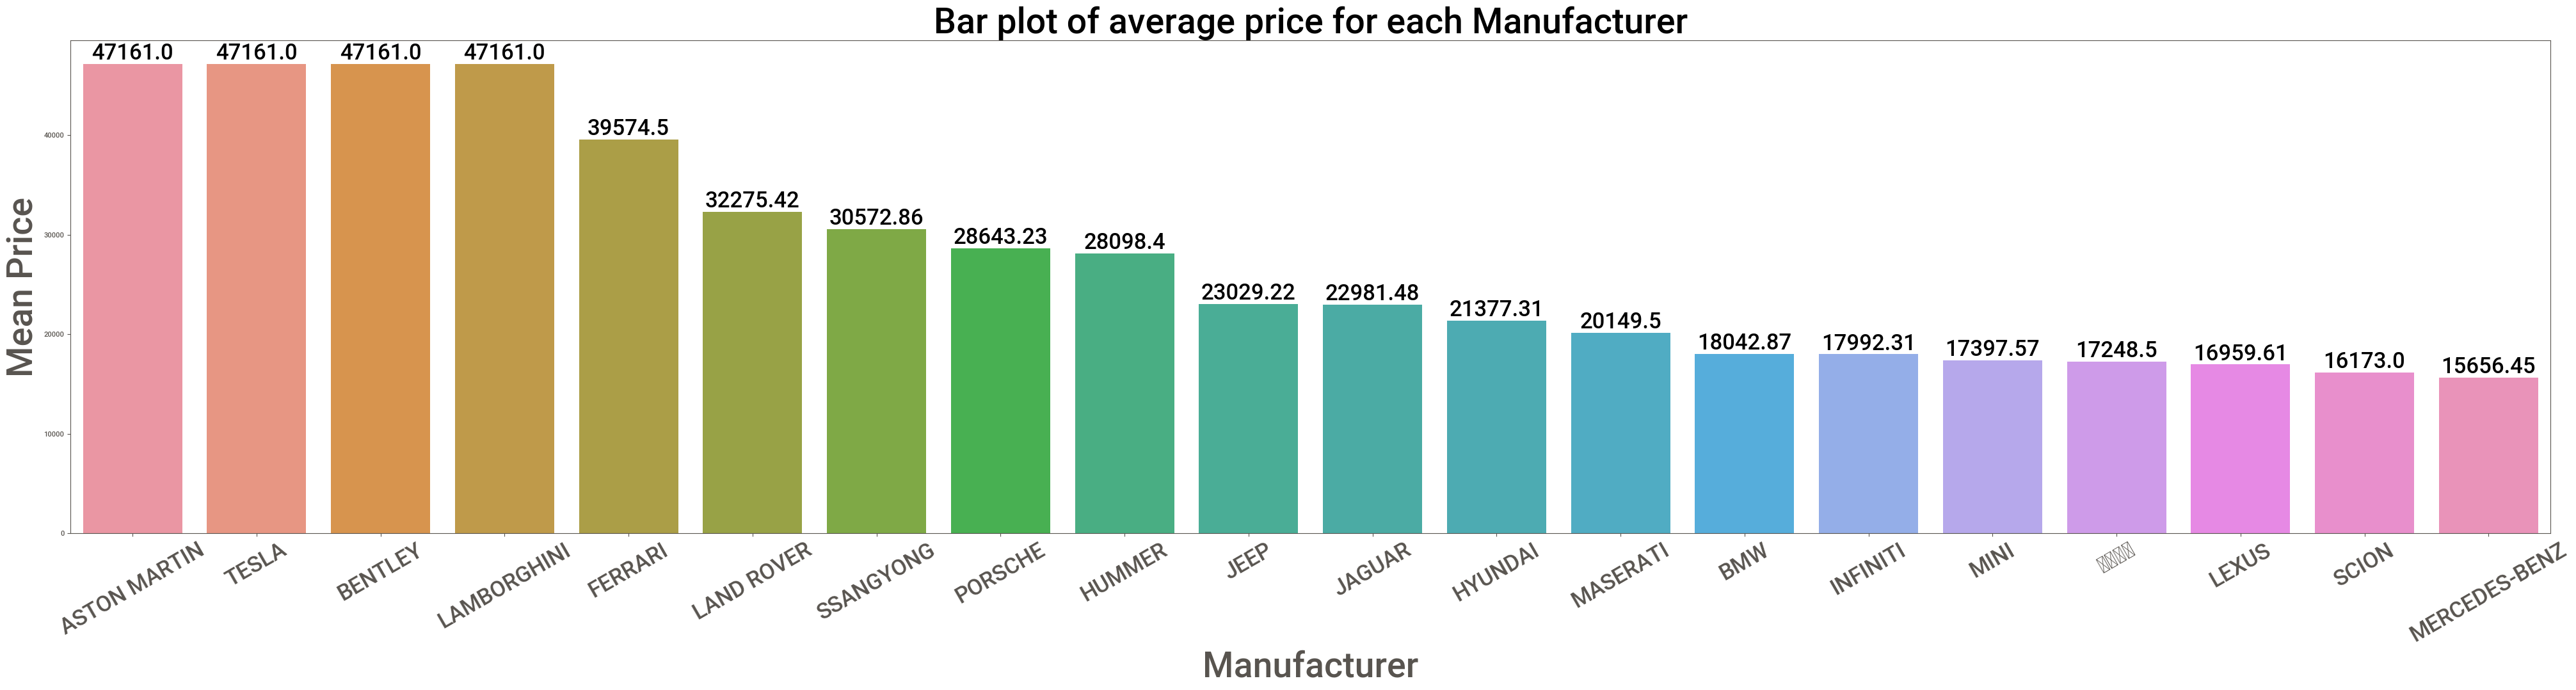

In [ ]:
df1 = data[['price', 'manufacturer']].groupby(by=['manufacturer'], as_index=False).agg('mean').sort_values(by='price', ascending=False)
top20_df1 = df1.head(20)

plt.figure(figsize=(50, 10))
plot = sns.barplot(x="manufacturer", y="price", data=top20_df1)

for i, bar in enumerate(plot.patches):
    height = bar.get_height()

    plot.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
              ha='center', va='bottom', fontsize=25)

plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center', fontsize=25)
plt.title('Bar plot of average price for each Manufacturer', fontsize=40)
plt.xlabel('Manufacturer', fontsize=40)
plt.ylabel('Mean Price', fontsize=40)
plt.show()


From this we can depict the costliest car manufacturers.

2. Models

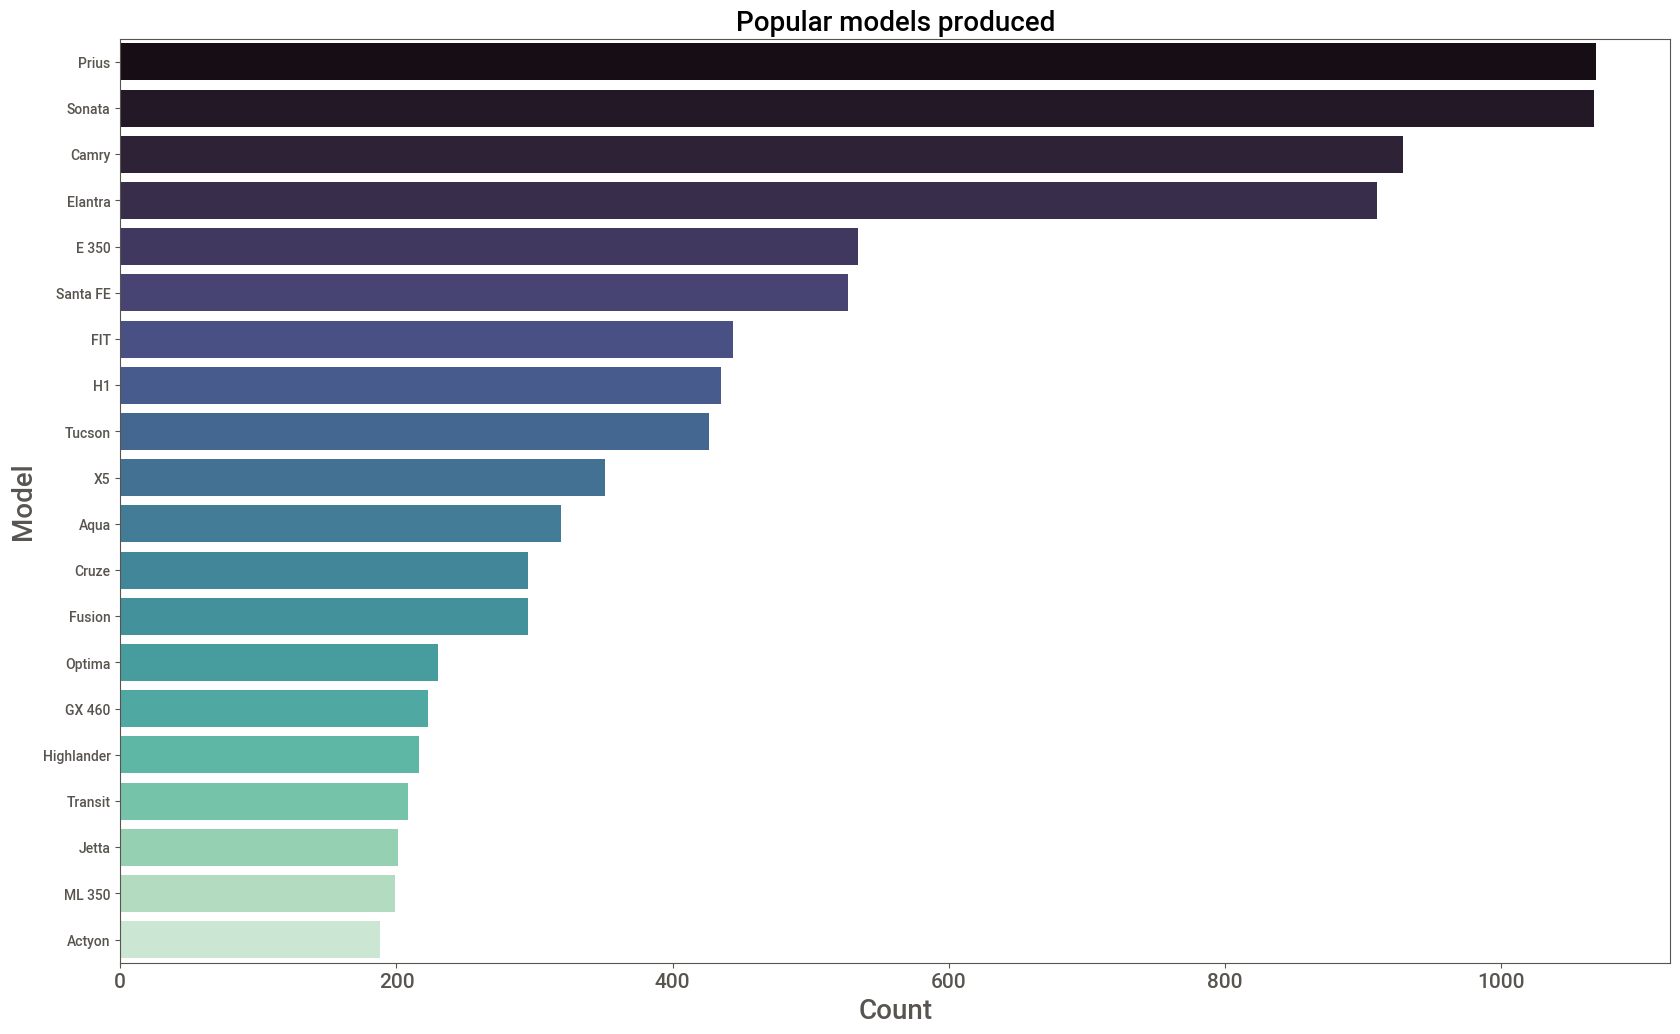

Prius       1069
Sonata      1067
Camry        929
Elantra      910
E 350        534
Santa FE     527
FIT          444
H1           435
Tucson       426
X5           351
Name: model, dtype: int64
There are 1590 Models in the dataset


In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.countplot(y="model", data=data, palette="mako", order=data['model'].value_counts().nlargest(n=20).sort_values(ascending=False).index)

plt.title('Popular models produced', fontsize=20)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Model", fontsize=20)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.tick_params(axis='x', labelsize=15)

plt.show()

print(data['model'].value_counts().nlargest(n=10))
print(f'There are {data["model"].nunique()} Models in the dataset')


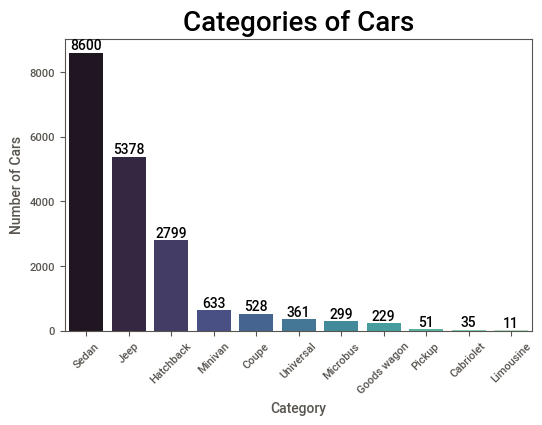

In [ ]:
Category=data['category'].value_counts()
plt.title("Categories of Cars",fontsize=20)
plt.tight_layout(pad=5)
ax=sns.barplot(x=Category.index,y=Category,palette='mako')
ax.set_xticklabels(Category.index,rotation=45)
ax.set(xlabel='Category', ylabel='Number of Cars')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
fig = px.treemap(data_frame=data,path=["manufacturer","category","model"],values='price',title='Popular Categories W.R.T Different Manufacturers')
fig.show()

Therefore, we can say that Sedan category is most produced by the manufacturer and from these Prius model is highly produced and popular amongst customers

4. Production Years

There are 54 years in the dataset


Text(0, 0.5, 'Count')

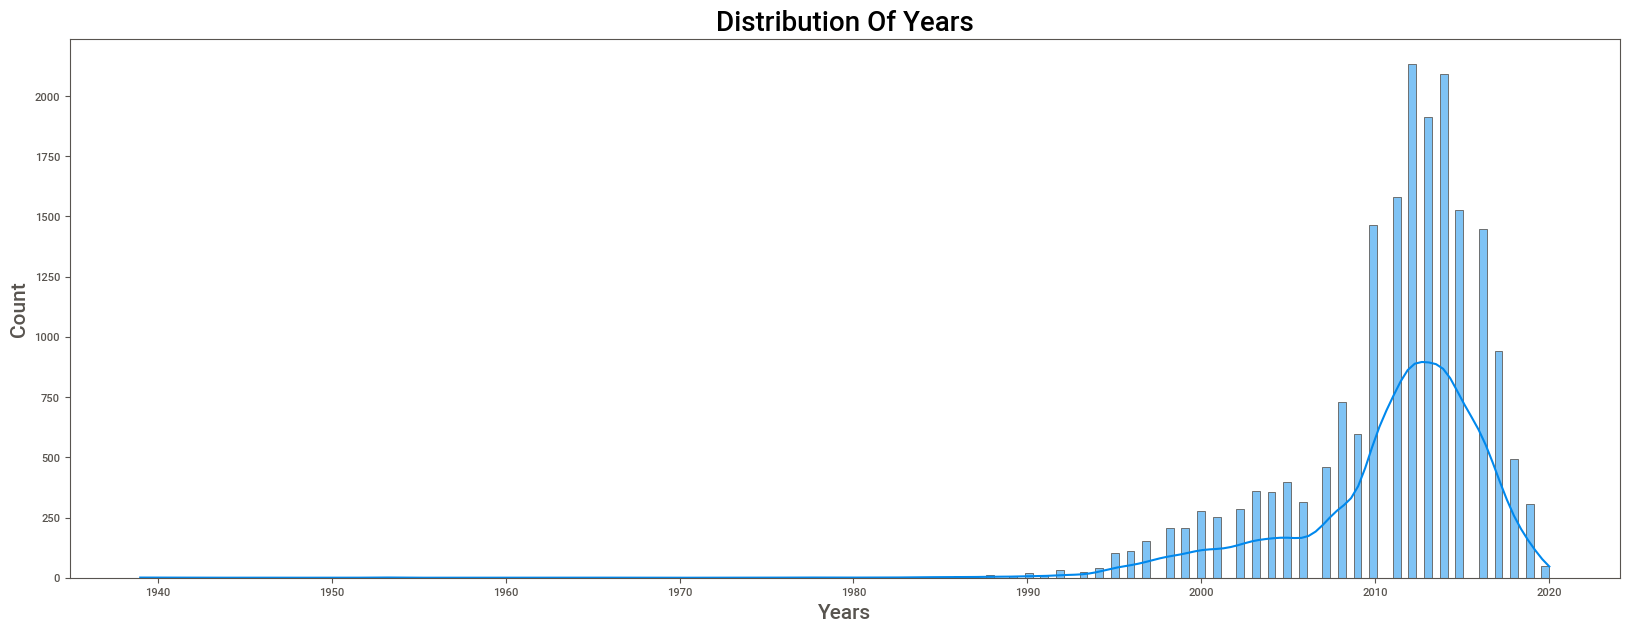

In [ ]:
print(f'There are {data["prod_year"].nunique()} years in the dataset')
plt.figure(figsize=(20,7))
sns.histplot(data['prod_year'],kde=True)
plt.title('Distribution Of Years',fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Count",fontsize=15)

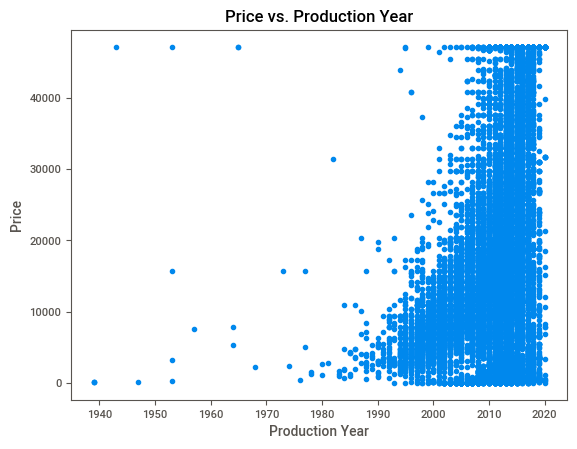

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Price vs. Production Year
plt.scatter(data['prod_year'], data['price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Price vs. Production Year')
plt.show()


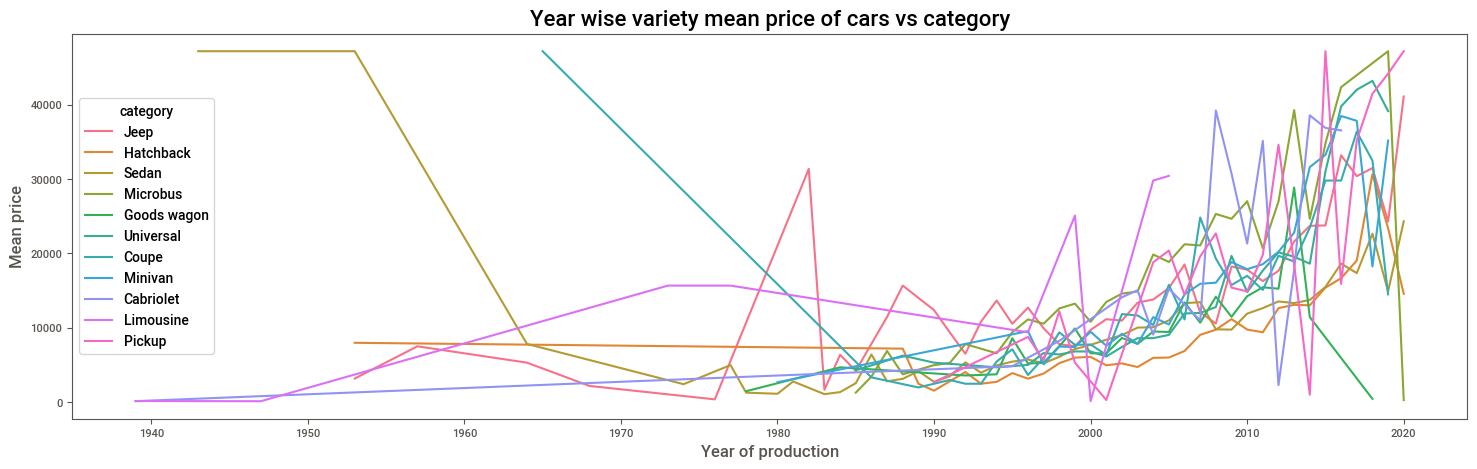

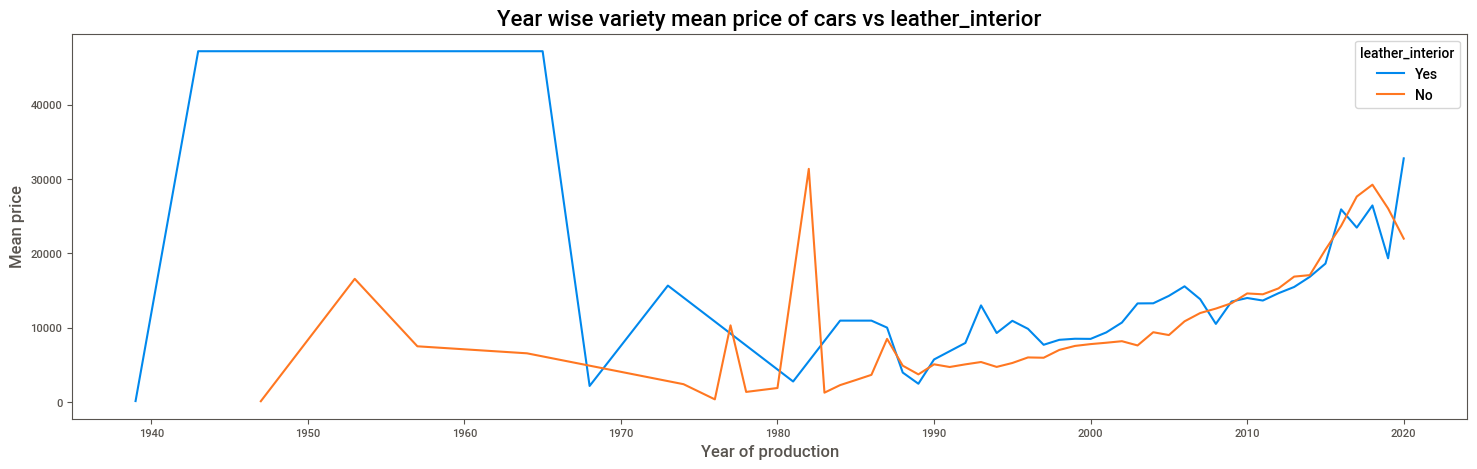

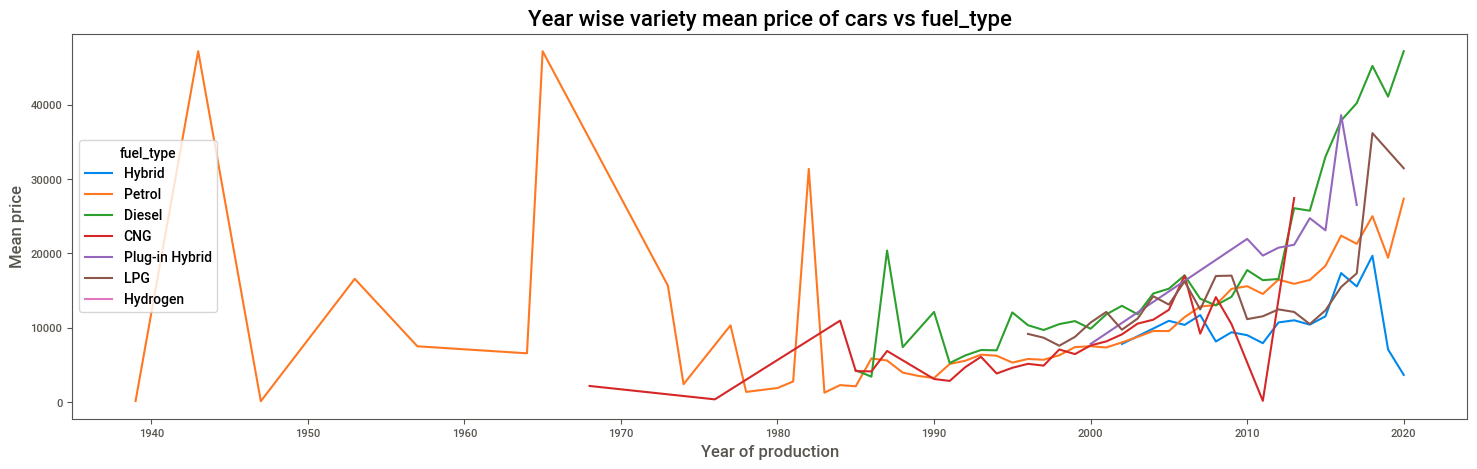

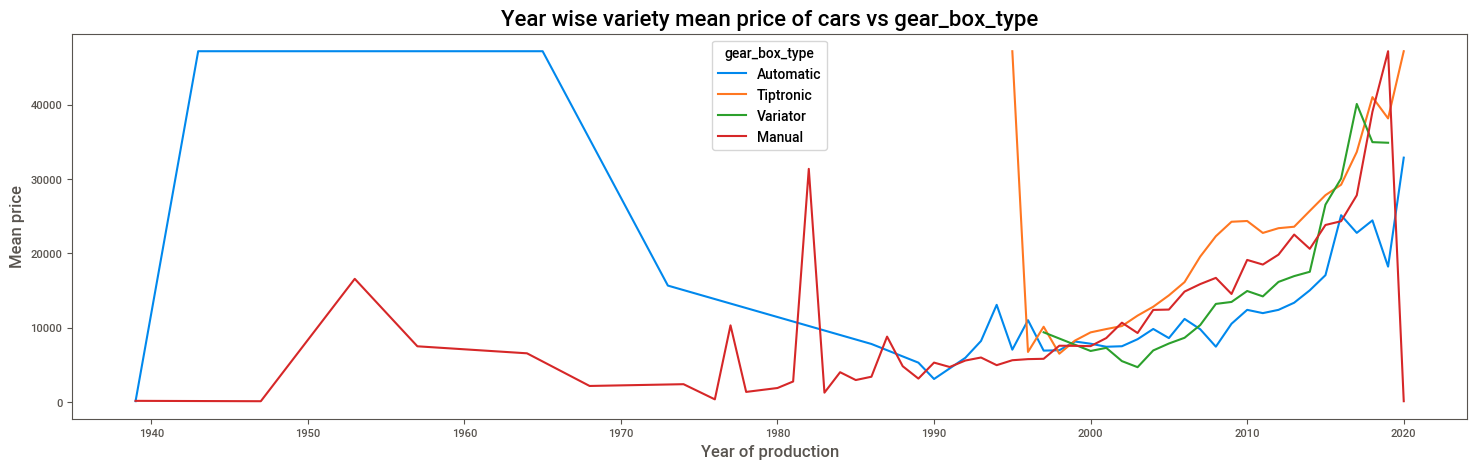

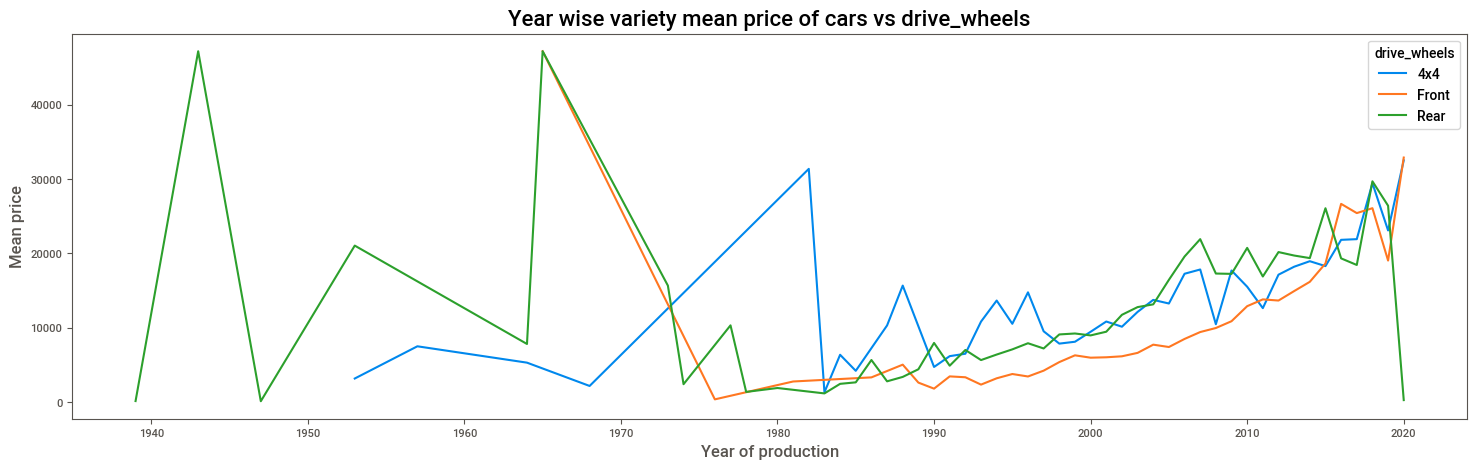

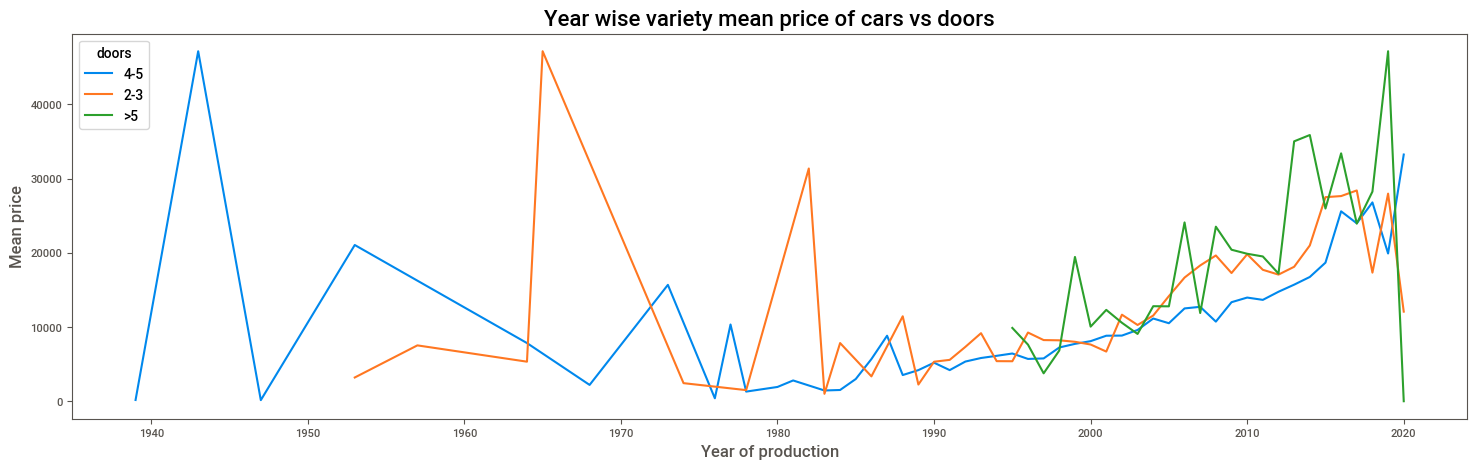

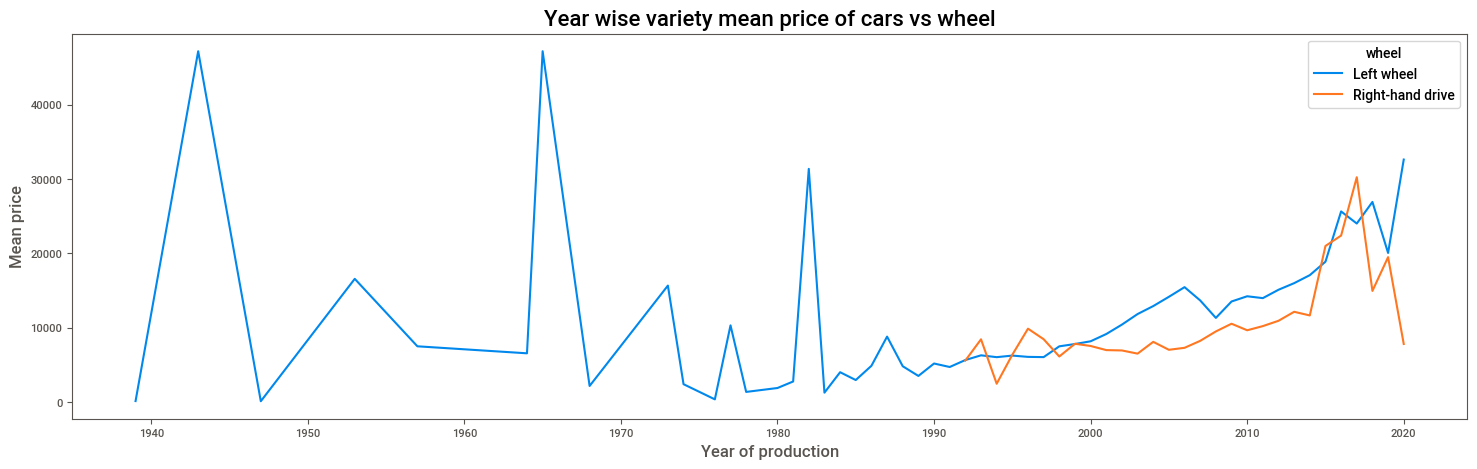

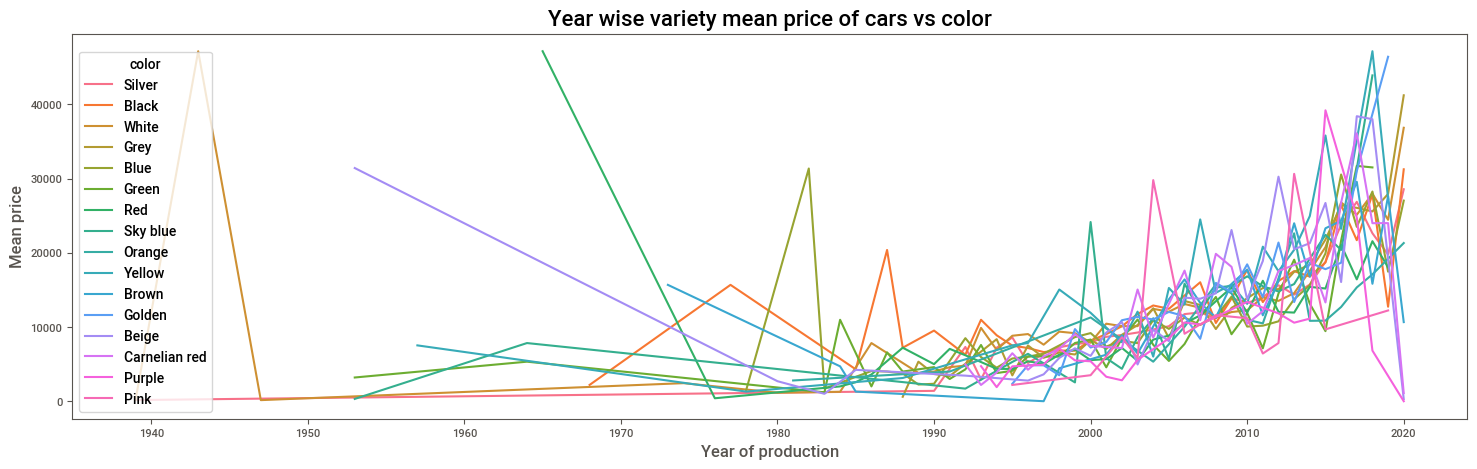

In [ ]:

lcv = data[cat_feature]
lcv.drop(columns=['manufacturer', 'model'], inplace=True)

for n, column in enumerate(lcv):
    plt.figure(figsize=(18, 5))
    sns.lineplot(data=data, x='prod_year', y='price', hue=column, errorbar=None)
    plt.title(f'Year wise variety mean price of cars vs {column}', fontsize=16, weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Mean price', fontsize=12)
    plt.show()


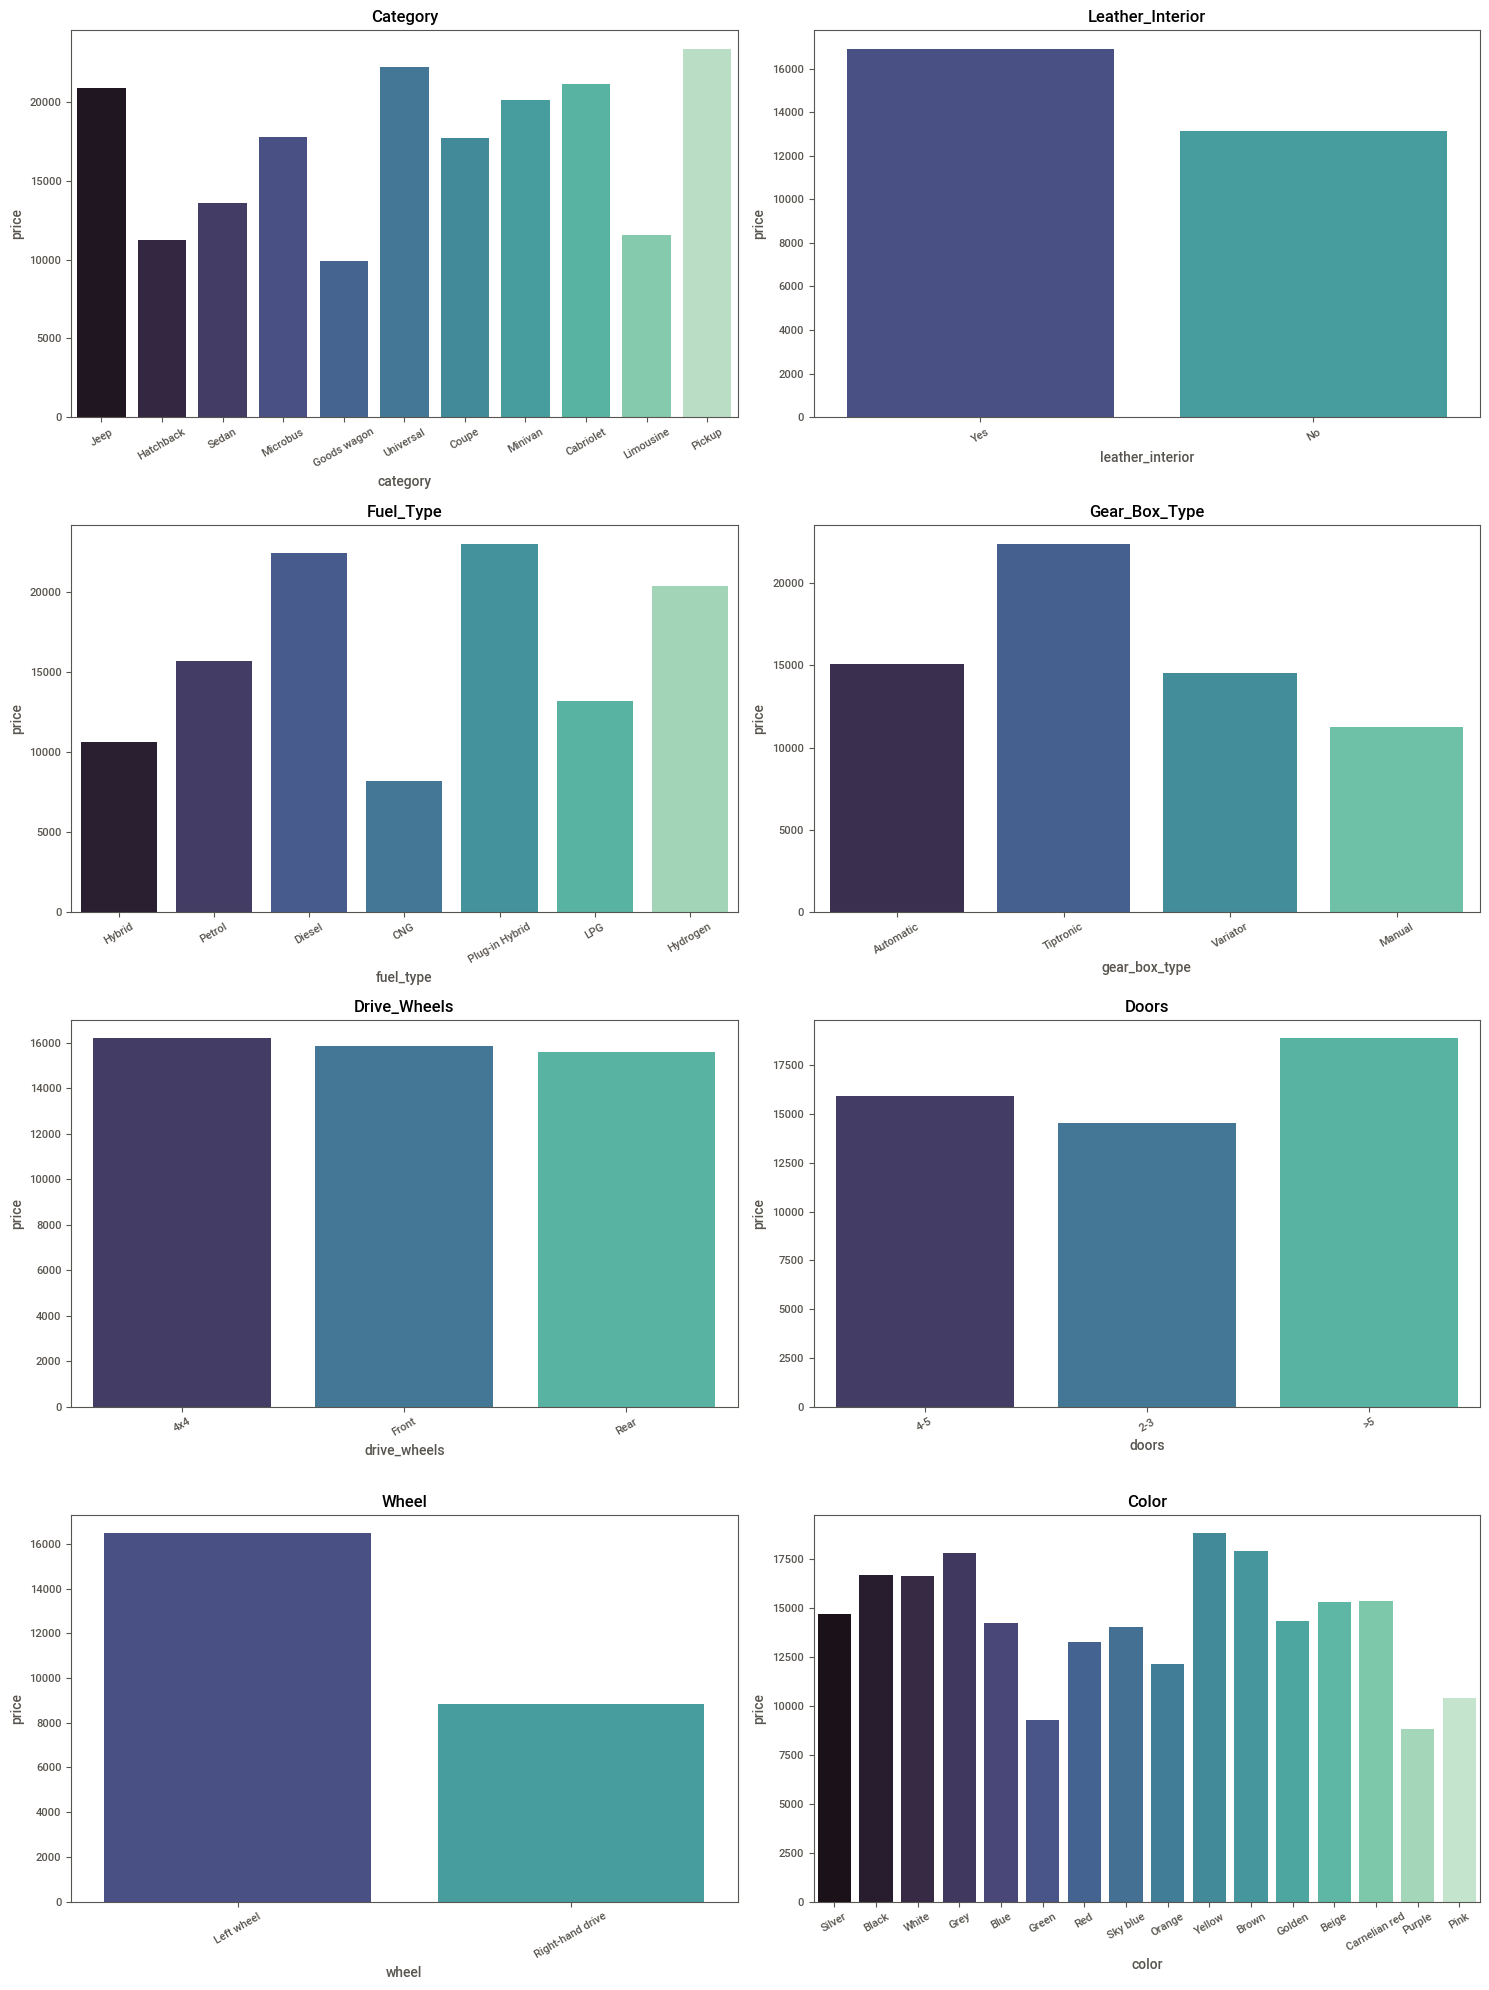

In [ ]:
plt.figure(figsize=(15,20))
for n,column in  enumerate(lcv):
    plot=plt.subplot(4,2,n+1)
    c1=sns.barplot(x =data[column], y= data['price'],palette="mako",errorbar=None)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

The dataset contains data of last 54 years from 2020
From distribution plot ,we come to know that there is high frequency of cars manufactured between 2010 and 2017. There is also skewness in the production years

We can also get an idea that:
- Leather seats always tend to have higher price
- Recently tiptrotinic type gearboxes is Highly used and Affects the price a lot
- Doors having more than 5 doors are recently introduced and they affect the price. Apparently 2-3 door cars have a higher price.

5. Leather Interiors


  leather_interior         price
0               No  13144.343925
1              Yes  16923.652829



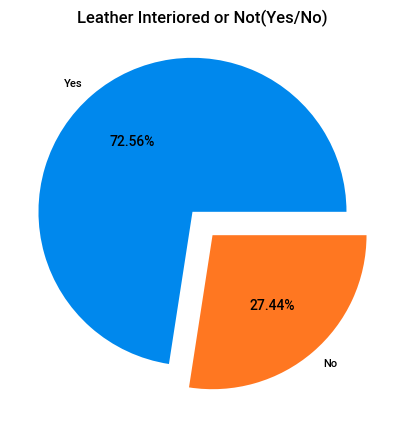

In [ ]:
mean_price_interior = data[['leather_interior', 'price']].groupby('leather_interior', as_index = False).mean()
print(mean_price_interior)
print()
leather_Interior = ['Yes','No']
plt.figure(figsize=(6,5))
plt.title('Leather Interiored or Not(Yes/No)')
plt.pie(data['leather_interior'].value_counts(),autopct='%1.2f%%',labels = leather_Interior,explode=(0.1,0.1));
plt.show()

We Can see that the price increases with the leathered seats

6. Doors

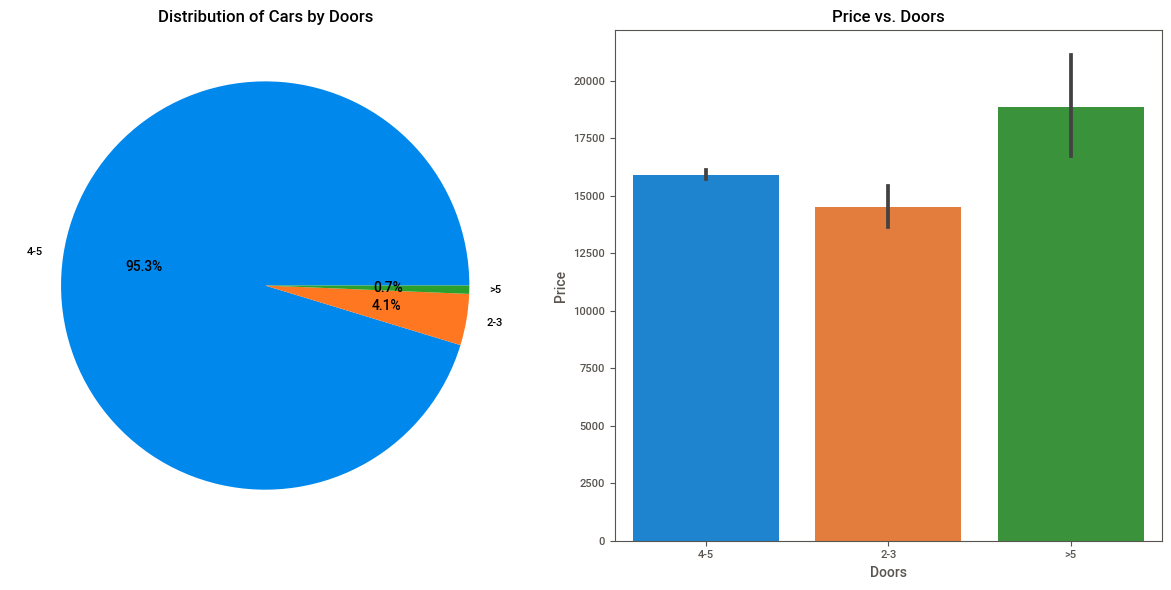

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(data['doors'].value_counts(), labels=data['doors'].unique(), autopct='%1.1f%%')
axes[0].set_title('Distribution of Cars by Doors')

sns.barplot(data=data, y='price', x='doors', ax=axes[1])
axes[1].set_title('Price vs. Doors')
axes[1].set_xlabel('Doors')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()


Feature Engineering

Checking skewness before removing the unnecessary columns

Text(0.5, 1.0, 'Distribution of the column - Price')

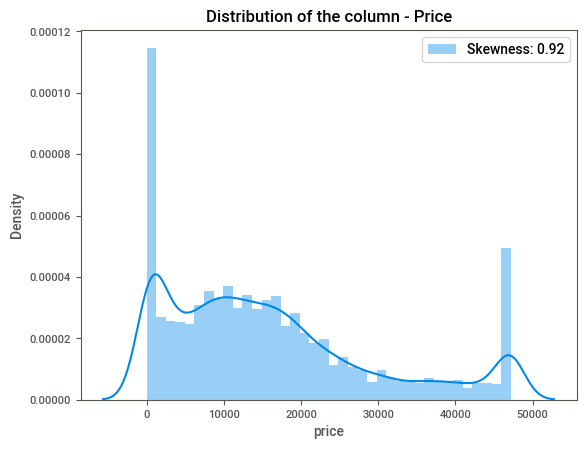

In [ ]:
sns.distplot(data['price'], label = 'Skewness: %.2f'%(data['price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

Text(0.5, 1.0, 'Distribution of the column - Price')

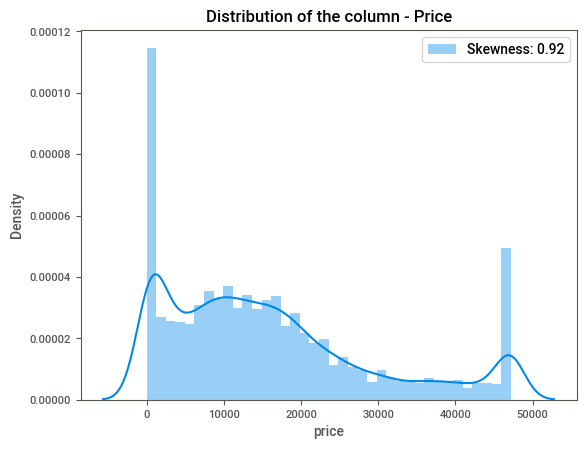

In [ ]:
datan=data.copy()
datan.drop(['color'], axis = 1, inplace = True)
sns.distplot(datan['price'], label = 'Skewness: %.2f'%(datan['price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

##### For preparation of the data for ML Model we will do encoding of categorial variables. We will be using Ordinal Encoding so that the encoding of the variables doesnt affect the model this much and gives accurate results. A heat map is shown at the end to show that the correlation is not affected even after encoding

In [ ]:
# Since it doesnt affect the distribution
data.drop(['color'], axis = 1, inplace = True)


In [ ]:
dfenc= data.copy()
targetEncod = ce.LeaveOneOutEncoder()
ordinalEncoder = OrdinalEncoder()

dfenc['manufacturer']=ordinalEncoder.fit_transform(data[['manufacturer']])
dfenc['model'] = ordinalEncoder.fit_transform(data[['model']])
dfenc['category'] = ordinalEncoder.fit_transform(data[['category']])
dfenc['leather_interior'] = data['leather_interior'].map({"Yes":1,"No" : 0})
dfenc['doors'] = data['doors'].map({'4-5':4, '2-3':2, '>5':5})
dfenc['fuel_type'] = ordinalEncoder.fit_transform(data[['fuel_type']])
dfenc['gear_box_type'] = ordinalEncoder.fit_transform(data[['gear_box_type']])
dfenc['drive_wheels'] = ordinalEncoder.fit_transform(data[['drive_wheels']])
dfenc['wheel'] = data['wheel'].map({"Left wheel":0,"Right-hand drive" : 1})
dfenc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18924 non-null  float64
 1   levy              18924 non-null  float64
 2   manufacturer      18924 non-null  float64
 3   model             18924 non-null  float64
 4   prod_year         18924 non-null  int64  
 5   category          18924 non-null  float64
 6   leather_interior  18924 non-null  int64  
 7   fuel_type         18924 non-null  float64
 8   engine_volume     18924 non-null  float64
 9   mileage           18924 non-null  float64
 10  cylinders         18924 non-null  float64
 11  gear_box_type     18924 non-null  float64
 12  drive_wheels      18924 non-null  float64
 13  doors             18924 non-null  int64  
 14  wheel             18924 non-null  int64  
 15  airbags           18924 non-null  int64  
 16  turbo             18924 non-null  int64 

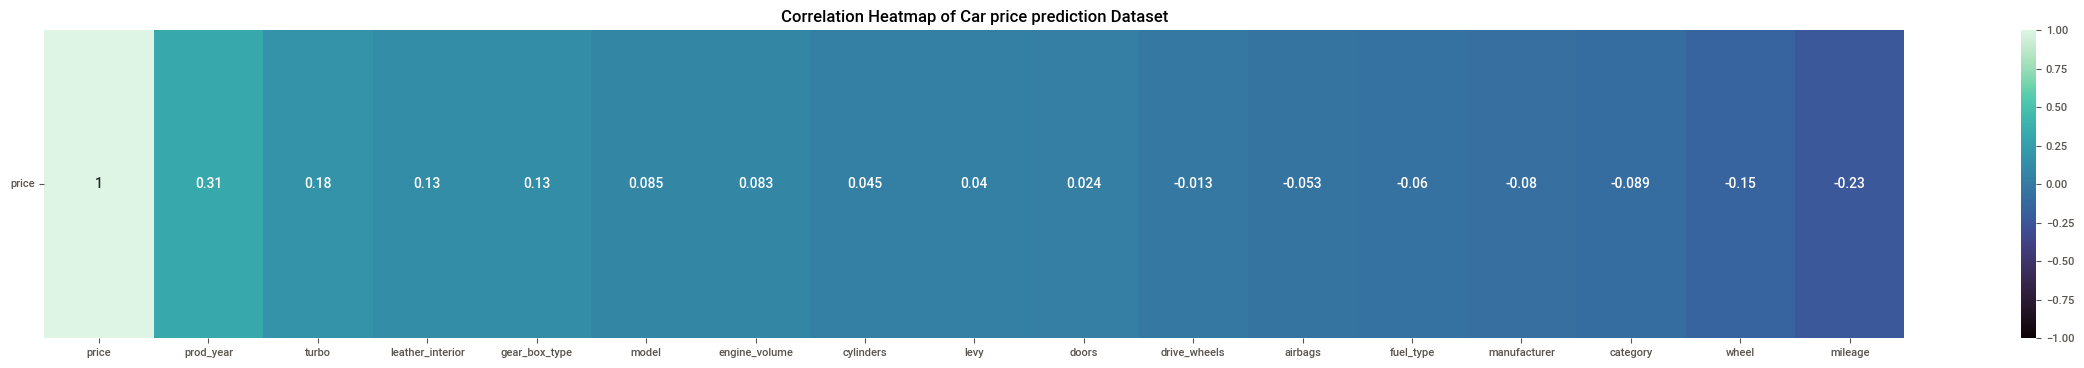

In [ ]:
Target_corr  = dfenc.corr().loc[:, 'price'].to_frame().sort_values(by = 'price' , ascending=False).T
plt.figure(figsize=(30,4))
plot = sns.heatmap(Target_corr, annot=True, cmap='mako', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

# Building ML Model

In [ ]:
dfclean= dfenc.copy()
dfclean.drop_duplicates(inplace= True)

Performing Data split for the model

In [ ]:
x= dfclean.drop('price',axis=1)
y= dfclean['price']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

1. Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_regressor.predict(X_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

y_test        y_pred
99     15458.0  15907.046431
9881   44752.0  26635.405255
3132   47161.0  21789.137394
2333   18346.0  19997.677901
15614  12000.0  28071.261473

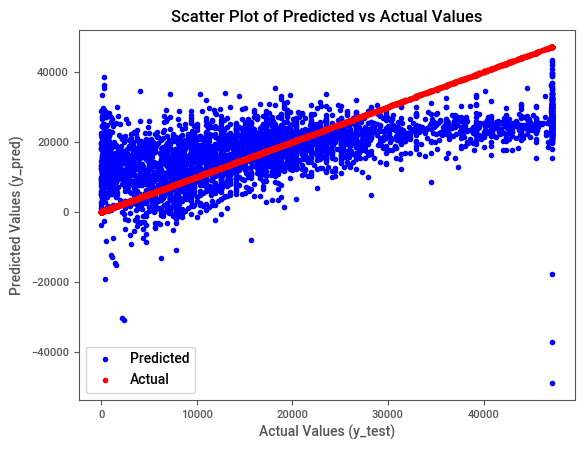

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(LR['y_test'], LR['y_pred'], color='blue', label='Predicted')
plt.scatter(LR['y_test'], LR['y_test'], color='red', label='Actual')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Predicted vs Actual Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from math import sqrt

mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)
r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 8330.88
Mean Squared Error of the model is : 118083109.196
Root Mean Squared Error of the model is : 10866.605
R-squared value of the model is : 0.338


2. Gradient Boost Regressor

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = GB.predict(X_test)
gbx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gbx.head()

y_test        y_pred
99     15458.0  15653.200253
9881   44752.0  44272.139045
3132   47161.0  22753.390104
2333   18346.0  20417.141195
15614  12000.0  12020.757312

In [ ]:
from math import sqrt

mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)
r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 5421.815
Mean Squared Error of the model is : 57214015.057
Root Mean Squared Error of the model is : 7563.995
R-squared value of the model is : 0.679


3. Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters: ", best_params)

Best Parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
Rf = RandomForestRegressor(n_estimators = 300,max_depth=20, max_features='sqrt',random_state=1)
Rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      random_state=1)

In [ ]:
y_pred = Rf.predict(X_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

y_test        y_pred
99     15458.0  15435.904514
9881   44752.0  43286.258554
3132   47161.0  37015.742057
2333   18346.0  21115.107941
15614  12000.0  13285.832104

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)
r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(mae))
print('Mean Squared Error of the model is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Mean Absolute Error  of the model is : 4119.866
Mean Squared Error of the model is : 40046699.949
Root Mean Squared Error of the model is : 6328.246
R-squared value of the model is : 0.775


Comparing All the Evaluated models

In [ ]:
models= [LinearRegression(),
         GradientBoostingRegressor(),
         RandomForestRegressor(n_estimators = 300,max_depth=20, max_features='sqrt',random_state=1)]
scores= []
test_score = []
train_score=[]
train_times = []
names= []

for model in models:
    start= time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score With Cross-Validation'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    score1=model.score(X_train, y_train)
    train_score.append(score1)
    score2=model.score(X_test, y_test)
    test_score.append(score2)
df['Test_Score'] = test_score
df['Train_Score'] = train_score

In [ ]:
df

Model  Score With Cross-Validation       Time  \
0           LinearRegression                     0.338743   0.116328   
1  GradientBoostingRegressor                     0.647933   6.327972   
2      RandomForestRegressor                     0.740040  26.714316   

   Test_Score  Train_Score  
0    0.337986     0.341033  
1    0.679125     0.671431  
2    0.775485     0.951882

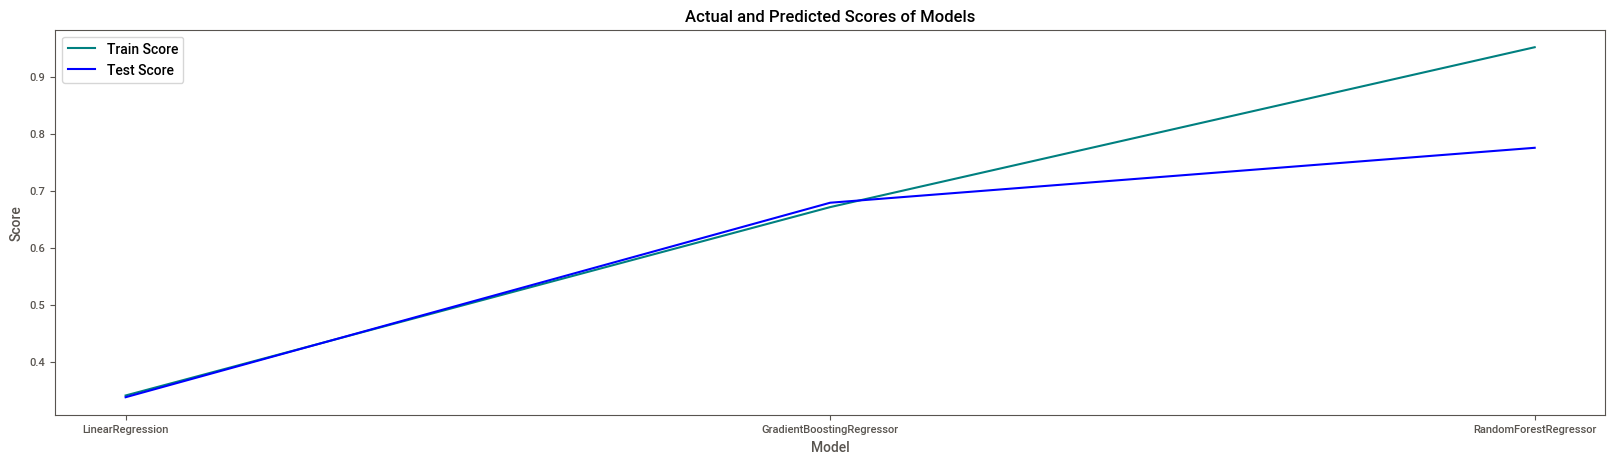

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df['Model'], df['Train_Score'], color='teal', label='Train Score')
plt.plot(df['Model'], df['Test_Score'], color='blue', label='Test Score')
plt.title('Actual and Predicted Scores of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.show()
